# Clustering

# Índice 
1. [Introduction](#introduction)
2. [Import Materials](#importmaterials)    
    2.1. [Import Libraries](#importlibraries)     
    2.2. [Import the dataset](#importdataset)
3. [Data Exploration](#dataanalysis)    
    3.1. [Dataset Overview](#overview)   
    3.2. [Duplicates](#duplicates)     
    3.3. [Data Types](#datatypes)   
    3.4. [Strange Values](#strangevalues)    
    3.5. [Missing Values](#missingvalues)         
4. [Feature Engineering](#featureengineering)    
5. [Scaling Methods](#scaling)      

<hr>
<a class="anchor" id="introduction">
    
# 1. Introduction
    
</a>


This notebook analyzes customer data from ABCDEats Inc., a fictional food delivery service, over three months. The goal is to create clusters of customers and make different marketing startegies for each of them....    
**Project by** Dinis Pinto (20240612), Joana Rodrigues (20240603), João Marques (20240656), and Mara Simões (20240326) - **Group 27**.

<hr>
<a class="anchor" id="importmaterials">
    
# 2. Import Materials
    
</a>

<hr>
<a class="anchor" id="importlibraries">
    
## 2.1. Import Libraries
    
</a>

For this project, we'll install some helpful libraries to make analysis easier and add features like better plotting, data handling, and modeling tools. For example, `matplotlib` and `seaborn` allow us to create clear, customizable plots, while `pandas` and `numpy` make data processing smoother.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
import pickle

<hr>
<a class="anchor" id="importdataset">
    
## 2.2. Import Dataset
    
</a>

### Data in dataset
The different columns in the dataset give out the following information:   
- `customer_id` - Unique identifier for each customer.
- `customer_region` - Geographic region where the customer is located.
- `customer_age` - Age of the customer.
- `vendor_count` - Number of unique vendors the customer has ordered from.
- `product_count` - Total number of products the customer has ordered.
- `is_chain` - Indicates whether the customer’s order was from a chain restaurant.
- `first_order` - Number of days from the start of the dataset when the customer first placed an order.
- `last_order` - Number of days from the start of the dataset when the customer most recently placed an order.
- `last_promo` - The category of the promotion or discount most recently used by the customer.
- `payment_method` - Method most recently used by the customer to pay for their orders.
- `CUI_American`, `CUI_Asian`, `CUI_Chinese`, `CUI_Italian`... - The amount in monetary units spent by the customer from the indicated type of cuisine. 
- `DOW_0` to `DOW_6` - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- `HR_0` to `HR_23` - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).

In [2]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv',sep=',') # import the data

<hr>
<a class="anchor" id="datapreprocessing">
    
# 3. Data Exploration
</a>

<hr>
<a class="anchor" id="overview">
    
## 3.1. Dataset Overview
</a>
This subsection is meant to help visualize the data in the file to understand what the necessary steps will be in data preprocessing.

In [3]:
df.head() # To visualize the first lines of the dataset

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.tail(2) # to check if the last row is not the sum of all values in each column to avoid false outliers
# In this case there is no agreegation of values in the last column.

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30.0,1,1,0,NaN,0,-,CASH,...,0,0,1,0,0,0,0,0,0,0


In [5]:
df.shape

(31888, 56)

In [6]:
df.info() # Allows to verify the different types of data and the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

Describing the numerical variables gives us fundamental characteristics that can helps us through the analysis

In [7]:
df.describe().T # We invert the columns to be able to see all data

,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.506499,7.160898,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.102609,2.771587,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.668245,6.957287,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.818866,3.977529,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.478604,24.109086,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.675521,23.226123,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.960451,23.564351,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.300633,8.479734,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.801163,6.427132,0.0,0.0,0.0,0.00,326.10


In the next step, a description of the categorical variables is provided.

In [8]:
df.describe(include = ['O']).T

,count,unique,top,freq
customer_id,31888,31875,742ca068fc,2
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


The column `customer_id` only has values in 31'888 rows. However, only 31'875 of these are unique. This means there are customers appearing twice which can be caused by rows that are duplicated. We'll analyse this better in the next section to be able to jump into more fundamented conclusions. 

<hr>
<a class="anchor" id="duplicates">
    
## 3.2. Duplicates
</a>

Taking into account that there are customers appearing twice, we will go through the dataset to see if there are duplicated rows. 
As this dataset is very complex and with a lot of columns, if we find rows with exactly the same information, it is really likely that they are indeed duplicated and therefore should be erased.

In [9]:
df.duplicated().sum() # checks how many rows are duplicated rows

# For verification purposes we can use the following code, that shows the duplicates of 'customer_id' with all columns for better understanding
# df[df['customer_id'].duplicated(keep=False)].sort_values(by='customer_id')

13

We found 13 duplicates but as they are all repeated information and therefore don't add anything new to our analysis, we erase them.

In [10]:
df.drop_duplicates(inplace=True) # to drop duplicates

In [11]:
df.describe(include = ['O']).T

,count,unique,top,freq
customer_id,31875,31875,1b8f824d5e,1
customer_region,31875,9,8670,9761
last_promo,31875,4,-,16744
payment_method,31875,3,CARD,20153


As we drop the duplicates, the customer_id is left with only unique values.

Seeing if the same customer might have different ID, if all the values in the same row have the same values, they will be considered as an error.

In [12]:
duplicates = df[df.drop(columns=['customer_id']).duplicated(keep=False)]
duplicates

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
43,412c8c0b2d,2360,24.0,1,2,0,0.0,11,DELIVERY,DIGI,...,0,0,0,0,0,0,1,0,0,0
45,4336560739,2360,24.0,1,2,0,0.0,11,DELIVERY,DIGI,...,0,0,0,0,0,0,1,0,0,0
1641,11a56d6fbf,4660,32.0,3,4,3,1.0,43,-,CARD,...,0,1,2,0,0,0,0,0,0,0
1647,dcc76a0a1b,4660,32.0,3,4,3,1.0,43,-,CARD,...,0,1,2,0,0,0,0,0,0,0
3771,839055942a,4660,25.0,4,5,5,3.0,69,-,CARD,...,0,1,1,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30899,29d575f3cc,8670,31.0,1,2,0,82.0,82,-,CARD,...,0,0,0,0,1,0,0,0,0,0
30995,4ff02cb613,8670,30.0,1,1,0,83.0,83,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
31088,a6bdd77ae2,8670,30.0,1,1,0,83.0,83,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
31472,1f616608ed,2360,23.0,1,2,1,87.0,87,DELIVERY,CARD,...,0,0,0,1,0,0,0,0,0,0


In [13]:
# Drop these duplicate rows from the original dataframe
df_cleaned = df[~df.index.isin(duplicates.index)]

In [14]:
df.set_index('customer_id', inplace=True)

<hr>
<a class="anchor" id="datatypes">
    
## 3.3. Data types
</a>

Accurate data types are essential, so we’ll adjust them accordingly: `customer_age` and `first_order` should be integers instead of floats. The metadata for `is_chain` suggests it’s binary, but it isn’t; we’ll investigate this discrepancy.

In [15]:
df.customer_age = df.customer_age.astype("Int64")
df.first_order = df.first_order.astype("Int64")

# Change customer_age and first order to Int64 (Int64 so they can handle missing values)
# We can use df.dtypes to confirm this change

### 3.3.1. Data Types - is_chain
The metadata of the column is_chain is implying that this is a binary column. However, it has values ranging from 0 to 83. We will analyse this in further detail to understand the reason behind this and what these number mean.

In [16]:
df['is_chain'].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80], dtype=int64)

To understand if there is any relation between this column and any other

In [17]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'Int64'])
correlation_matrix = numeric_df.corr()
is_chain_correlation = correlation_matrix[['is_chain']].drop(['is_chain'])
high_corr_vars = is_chain_correlation[is_chain_correlation['is_chain'].abs() > 0.7].round(2)
high_corr_vars_list = list(high_corr_vars['is_chain'].items())
print("Variables with correlation greater than 0.7 with 'is_chain':", high_corr_vars_list)

Variables with correlation greater than 0.7 with 'is_chain': [('vendor_count', 0.76), ('product_count', 0.83)]


To see the relation between is_chain and product_count

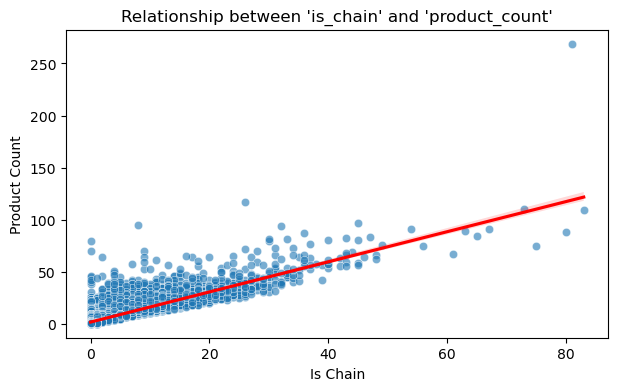

In [18]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x='is_chain', y='product_count', alpha=0.6)
sns.regplot(data=df, x='is_chain', y='product_count', scatter=False, color='red')  # Regression line
plt.title("Relationship between 'is_chain' and 'product_count'")
plt.xlabel("Is Chain")
plt.ylabel("Product Count")
plt.show()

In [19]:
if ((df['is_chain'] <= df['product_count']) | (df['product_count'] == 0)).all(): #df['product_count'] == 0 excludes errors (see 3.4.3.)
    print("is_chain is always smaller than product_count for all rows.")
else:
    print("Rows where is_chain is not always smaller than product_count and product_count is not 0:")
    display(df[(df['is_chain'] > df['product_count']) & (df['product_count'] != 0)])

is_chain is always smaller than product_count for all rows.


This way, we can conclude that the column is_chain is actually representing the total products that were ordered from a chain.
We choose not to turn this column into a binary since we think that the column as it is gives more relevant information.
We change `is_chain` to `chained` to match the contents - Indicates how many products order by the customer were chained.

In [20]:
# Rename the column 'is_chain' to 'chained'
df.rename(columns={'is_chain': 'chained'}, inplace=True)

<hr>
<a class="anchor" id="strangevalues">
    
## 3.4. Strange Values
</a>
Some columns in the descriptive analysis have shown to have values that can be considered as strange without any further analysis. This way, we will explore each of them more deeply to understand where they come from and whether they are indeed strange or can be intrepreted.

### 3.4.1. Strange Values - Region

In [21]:
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

The `-` character in the `customer_region` column likely represents unknown values, since we don't have any information about what these might be we will substitute them by the mode because it represents the most frequently occurring value in the column, making it a reasonable estimate for missing data.

In [22]:
# Calculate the mode of the customer_region column
mode_value = df['customer_region'].mode()[0]

# Replace '-' with the mode value
df.loc[df['customer_region'] == '-', 'customer_region'] = mode_value

# Verify the change
print(df['customer_region'].unique())


['2360' '8670' '4660' '2440' '4140' '2490' '8370' '8550']


Even though the column is categorical, transforming it into numerical one, will avoid needing to use one hot encoder later

In [23]:
df['customer_region'] = df['customer_region'].astype('Int64')

### 3.4.2. Strange Values - Promotion

In [24]:
df['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

The `-` in this column seem ambiguous initially, but it will be interpreted as indicating no promotion in future visualizations. This assumption is supported by the structure of the dataset, which shows that certain sorts of promotions are clearly represented by other values like DELIVERY, DISCOUNT, and FREEBIE.

In [25]:
# Replace '-' with 'NO PROMO' in the last_promo column
df['last_promo'] = df['last_promo'].replace('-', 'NO PROMO')

# Print unique values to confirm the change
print(df['last_promo'].unique())

['DELIVERY' 'DISCOUNT' 'NO PROMO' 'FREEBIE']


### 3.4.3. Strange Values - product_count & vendor_count
As we saw in the previous descriptive statistics, the columns product_count & vendor_count have a minimum value of 0 orders, this is odd as this means that there were no products ordered by those customers. 

In [26]:
print(f"Number of rows where both product_count and vendor_count are 0: {df[(df['product_count'] == 0) & (df['vendor_count'] == 0)].shape[0]}")
print(f"Number of rows where vendor_count is 0: {df[df['vendor_count'] == 0].shape[0]}")
print(f"Number of rows where product_count is 0: {df[df['product_count'] == 0].shape[0]}")
# Print unique customer regions with zero product and vendor counts
unique_errors_region = df[(df['product_count'] == 0) & (df['vendor_count'] == 0)]['customer_region'].unique()
print('Errors were in region(s):', unique_errors_region)


df['DOW_all'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)
unique_values_array = df[(df['product_count'] == 0) & (df['vendor_count'] != 0)][['vendor_count', 'DOW_all', 'customer_region']].drop_duplicates().values

print('When the product_count is 0 and the vendor_count is not zero, the column DOW_all and vendor_count have values of', unique_values_array)
# df[(df['product_count'] == 0) & (df['vendor_count'] != 0)][['vendor_count', 'product_count', 'DOW_all']] # to visualize this better

Number of rows where both product_count and vendor_count are 0: 138
Number of rows where vendor_count is 0: 138
Number of rows where product_count is 0: 156
Errors were in region(s): <IntegerArray>
[8670]
Length: 1, dtype: Int64
When the product_count is 0 and the vendor_count is not zero, the column DOW_all and vendor_count have values of [[1 1 4660]]


We can see that there are 138 orders that didn't have any product order nor vendor. These are most likely an error in the region 8670 since they imply that customers placed no orders.    
We can also see that there are rows where product_count is 0 and vendor_count is not. When looking through DOW_all with 1 order for each of these rows, we can conclude that, for these rows, the procut_count is of at least 1. 

In [27]:
df.loc[(df['product_count'] == 0) & (df['vendor_count'] != 0)]

,customer_region,customer_age,vendor_count,product_count,chained,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_all
customer_id,,,,,,,,,,,,,,,,,,,,,
aed85972bb,4660,27,1,0,0,6,6,DISCOUNT,CARD,0.00,...,0,0,0,1,0,0,0,0,0,1
b2ebe2e6e0,4660,43,1,0,0,6,6,NO PROMO,CARD,0.00,...,0,0,0,0,0,0,0,0,0,1
6f723d9894,4660,36,1,0,0,13,13,DELIVERY,CASH,0.00,...,0,0,0,0,0,0,0,0,0,1
9d74f2ac81,4660,27,1,0,0,19,19,DELIVERY,CARD,0.00,...,0,0,1,0,0,0,0,0,0,1
27b7eed8fa,4660,35,1,0,0,20,20,DISCOUNT,DIGI,0.00,...,1,0,0,0,0,0,0,0,0,1
6c9e68b2e7,4660,22,1,0,0,20,20,DISCOUNT,DIGI,0.00,...,0,1,0,0,0,0,0,0,0,1
c0b330c4df,4660,27,1,0,0,23,23,DELIVERY,CARD,0.00,...,0,0,0,0,0,0,0,0,0,1
68c4faeecb,4660,25,1,0,0,26,26,FREEBIE,DIGI,0.00,...,0,0,0,0,0,0,1,0,0,1
48e8abd5bf,4660,34,1,0,0,33,33,DELIVERY,CASH,0.00,...,0,0,0,0,0,0,0,0,0,1


In [28]:
# Filter the rows where DOW_all equals 1
filtered_df = df[df['DOW_all'] == 1]

# Calculate the median of product_count for these rows
median_product_count = filtered_df['product_count'].median()

In [29]:
# Remove rows where both product_count and vendor_count are 0
df = df.drop(df[df['vendor_count'] == 0].index) # erasing 138 rows

# Substitute product_count = 0 with 1 when vendor_count is not zero by the median of product_count when DOW_all is 1
df.loc[(df['product_count'] == 0) & (df['vendor_count'] != 0), 'product_count'] = median_product_count

# Verify the changes
print(f"Number of rows where both product_count and vendor_count are 0: {df[(df['product_count'] == 0) & (df['vendor_count'] == 0)].shape[0]}")
print(f"Number of rows where vendor_count is 0: {df[df['vendor_count'] == 0].shape[0]}")
print(f"Number of rows where product_count is 0: {df[df['product_count'] == 0].shape[0]}")


Number of rows where both product_count and vendor_count are 0: 0
Number of rows where vendor_count is 0: 0
Number of rows where product_count is 0: 0


<hr>
<a class="anchor" id="missingvalues">
    
## 3.5. Missing Values
</a>

As we previously saw, not all columns have 31'888 rows non-null, which means some of them have missing values. 
In the next steps, we can see with more details which of them have missing values and its amount.

In [30]:
missing_values = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing_values.columns = ['Total', 'Percentage']
missing_values.sort_values(by=['Total', 'Percentage'], ascending=False, inplace=True)
missing_values.T
#df.isna().sum() # To see how many missing values are in each column

,HR_0,customer_age,first_order,customer_region,vendor_count,product_count,chained,last_order,last_promo,payment_method,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,DOW_all
Total,1164.000000,727.000000,106.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,3.667643,2.290702,0.333995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.5.1. Missing values - HR_0

In [31]:
df['HR_0'].unique()

array([ 0., nan])

We observe that the values in the specified column are either zero or missing, suggesting missing values might represent zeros or an assignment error.
Since the columns are in the same unit, we can sum the totals of the DOW_s columns and compare them with the hours columns. We expect these totals to match. If they don't, we'll need to explore whether discrepancies relate to missing values in `HR_0`.


In [32]:
# Setting 2 new lists that amount the orders in the week and in the hours
# df['DOW_all'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1) defined above
df['HR_all'] = df.loc[:, 'HR_0':'HR_23'].sum(axis=1)

# Counting how many times DOW_all does not equal HR_all
(df['DOW_all'] != df['HR_all']).sum()

1164

We can see that there are as many rows where the sum of all days of the week is different from the sum of all hours as there are missing values in HR_0. Therefore we will see if they are the rows or if this number is just a coincidence.

In [33]:
# To check if DOW_all is not equal to HR_all
df['diff_check'] = df['DOW_all'] != df['HR_all']

# To check if all rows with differences have HR_0 missing
outcome = (df['diff_check'] == df['HR_0'].isna()).all()

if outcome == True:
    print('The rows where there are differences in the total using hours and using days of the week are the same as the rows where there are missing values in HR_0')
else:
    print('No conclusion to be made' )

The rows where there are differences in the total using hours and using days of the week are the same as the rows where there are missing values in HR_0


As the rows are exactly the same, we can conclude that the lack of values in HR_0 was an error and that its real value actually corresponds to the difference between the two summed columns. 
This way, we will substitute the missing values in HR_0 with the difference between the totals to guarantee more realistic visualizations.

In [34]:
df['HR_0'] = df['HR_0'].fillna(df['DOW_all'] - df['HR_all']) # Replace missing values in HR_0 with the calculated difference

df['HR_0'].isna().sum() # To confirm if the missing values were substituted

0

We drop this columns since they were only used for this purpose and won't be necessary anymore.

In [35]:
df.drop(columns=['diff_check', 'HR_all'], inplace=True)

### 3.5.2. Missing values - first_order

There are 106 missing values in the column 'first_order'. To understand better this column, we will see if, when this value is NaN, there is any pattern in other variables. 
For example if any of them has the value 0.

In [36]:
df_filtered = df[df['first_order'].isna()]
statistics = df_filtered.describe().T

zero_range_columns = statistics[statistics['max'] == 0]
print("Columns where max is equal to 0:", zero_range_columns.index.tolist())

Columns where max is equal to 0: ['last_order', 'CUI_Cafe', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'HR_22', 'HR_23']


In [37]:
# df[df['first_order'].isna()]['last_order'].unique() was used to experiment if there are patterns between the missing values of 'first_order' and other columns
# Checking if this corresponds exactly to 'last_order' being 0
outcome = ((df['first_order'].isna()) == (df['last_order'] == 0)).all()

if outcome:
    print("The rows where 'first_order' is NaN correspond exactly to the rows where 'last_order' is 0.")
else:
    print("There is no exact correspondence between rows where 'first_order' is NaN and where 'last_order' is 0.")

The rows where 'first_order' is NaN correspond exactly to the rows where 'last_order' is 0.


When `last_order` is 0, it means that the first and only time the customer ordered was on the day the company started its activity. From this, we conclude that all rows with a missing value in the `first_order` column correspond exactly to rows where `last_order` is 0. This indicates that these customers' first and last order was on the first day of activity. Therefore, all missing values in `first_order` actually correspond to 0.

In [38]:
df['first_order'] = df['first_order'].fillna(0)
df['first_order'].isna().sum() # To confirm if the missing values were substituted

0

### 3.5.3. Missing values - customer_age


In [39]:
# # Filter the DataFrame for rows where 'first_order' is NaN
# df_filtered = df[df['customer_age'].isna()]
# # To see if there is any odd pattern
# df_filtered.describe().T

We could not identify a pattern in the missing age values, suggesting they are missing completely at random, in contrast to the previous ones. This way, we chose to substitute the missing values of customer_age by the 5 nearest neighbours.    
The result ends up being the same as the mean but we round it to the unity to that is more real.

In [40]:
knn_imputer = KNNImputer(n_neighbors=5)
original_customer_age = df['customer_age'].copy()
print('Missing values of age are originally', original_customer_age.isnull().sum())
df['customer_age'] = knn_imputer.fit_transform(df[['customer_age']])
df['customer_age'] = df['customer_age'].round().astype(int)
replaced_values = df.loc[original_customer_age.isnull(), 'customer_age']
print("The values that KNN calculated are:", replaced_values.unique())
print('Missing values of age after the KNN imputation are', df['customer_age'].isnull().sum())
df.customer_age = df.customer_age.astype("Int64")


Missing values of age are originally 727
The values that KNN calculated are: [28]
Missing values of age after the KNN imputation are 0


<hr>
<a class="anchor" id="outliers">
    
## 3.6. Outliers
</a>

In [41]:
def feature_types(df):
    # Define the initial categorical columns
    categorical_columns = ['customer_region', 'last_promo', 'payment_method']
    
    if 'age_range' in df.columns:
        categorical_columns.append('age_range')
    
    # Identify numeric columns as all columns that are not in the categorical columns list
    numeric_columns = [col for col in df if col not in categorical_columns]

    return numeric_columns, categorical_columns


In [42]:
df['cuisine_all'] = df.loc[:, 'CUI_American':'CUI_Thai'].sum(axis=1)
numeric_columns, categorical_columns = feature_types(df)

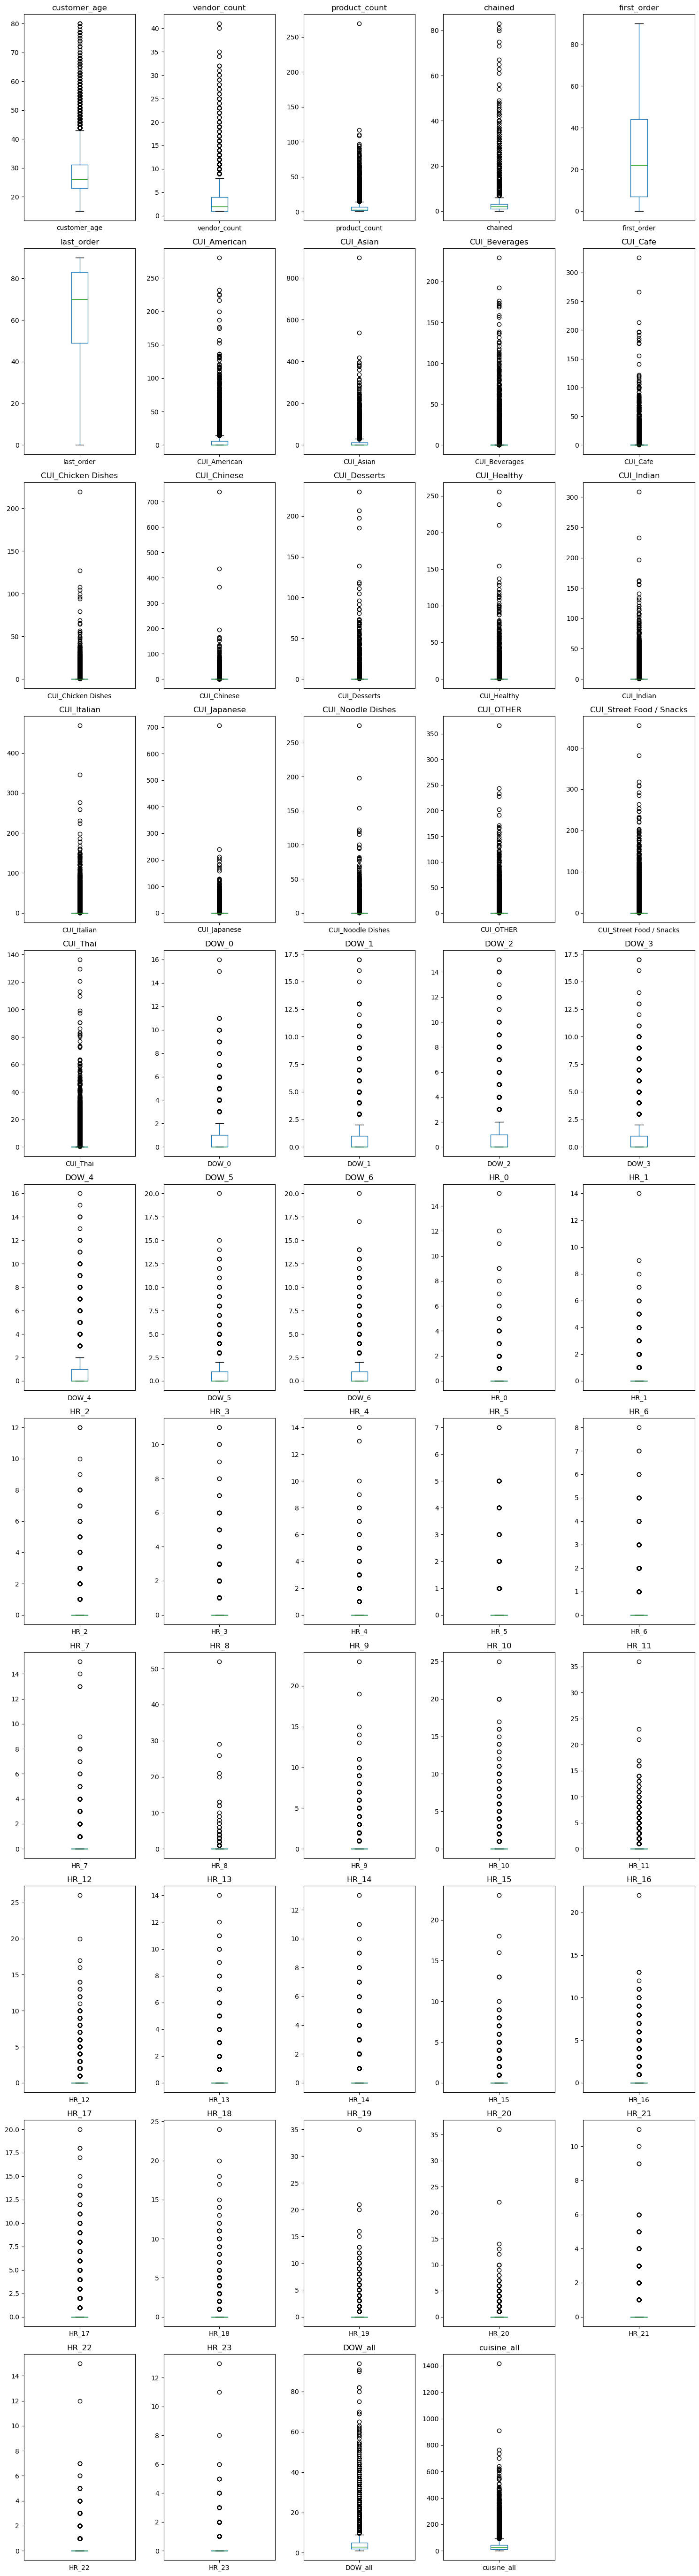

In [43]:
plots_per_row = 5
num_columns = len(numeric_columns)
num_rows = math.ceil(num_columns / plots_per_row)

# Set up the figure and axes
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows), squeeze=False)
axes = axes.flatten()

# Plot each numeric column
for i, col in enumerate(numeric_columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(False)

# Hide any unused axes
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

The following variables will not be analysed further, in this regard since:   
`customer_age`: No removal of the outliers as people with 80 years (maximum of the dataset) can order as well.   
`first_order`: There are no outliers in this as the dataset has a duration of 90 days.    
`last_order`: There are no outliers in this as the dataset has a duration of 90 days.

Variables such as `vendor_count`, `product_count`, `chained`, `DOW_all` and `cuisine_all` have notourious outliers and therefore we will analyse if the lines are the same to understand what we should do about them.

#### vendor_count

In [44]:
out_vend = df[numeric_columns].sort_values('vendor_count', ascending=False)[['vendor_count', 'product_count', 'chained', 'DOW_all', 'cuisine_all']].head(4)
#out_vend

#### product_count

In [45]:
out_prod = df[numeric_columns].sort_values('product_count', ascending=False)[['vendor_count', 'product_count', 'chained', 'DOW_all', 'cuisine_all']].head(4)
#out_prod

#### chained

In [46]:
out_chain = df[numeric_columns] .sort_values('chained', ascending=False)[['vendor_count', 'product_count', 'chained', 'DOW_all', 'cuisine_all']].head(4)
#out_chain

#### DOW_all

In [47]:
out_dow = df[numeric_columns] .sort_values('DOW_all', ascending=False)[['vendor_count', 'product_count', 'chained', 'DOW_all', 'cuisine_all']].head(7)
#out_dow

#### cuisine_all

In [48]:
out_cui = df[numeric_columns] .sort_values('cuisine_all', ascending=False)[['vendor_count', 'product_count', 'chained', 'DOW_all', 'cuisine_all']].head()
#out_cui

In [49]:
# Convert the indices into Series and then concatenate them
all_indexes = pd.concat([pd.Series(out_vend.index), pd.Series(out_prod.index), pd.Series(out_dow.index), pd.Series(out_cui.index), pd.Series(out_chain.index)])

# Count the occurrences of each index
index_counts = all_indexes.value_counts()

# Display the indices that appear more than once
index_counts[index_counts > 1]

customer_id
92ced2dcb9    5
89b7866691    3
d798652ec0    3
910e70571d    2
4b5be62a93    2
e1491fb8f7    2
Name: count, dtype: int64

#### Removal
As the outlier is an outlier in more than 4 of the different columns previously analysed we will consider it an atypical value.

In [50]:
df = df.drop(['92ced2dcb9', '89b7866691', 'd798652ec0'], axis=0)

The rest of the outliers will be removed through DBSCAN

In [51]:
numeric_columns, categorical_columns = feature_types(df)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_columns])
X_scaled = pd.DataFrame(X_scaled, columns=numeric_columns)

dbscan = DBSCAN(eps=6, min_samples=2)
labels = dbscan.fit_predict(X_scaled)

outlier_indices = np.where(labels == -1)[0]

df = df.drop(index=df.iloc[outlier_indices].index)

print(f"Number of rows after outlier removal: {df.shape[0]}")
print(f"Total number of outliers removed: {len(outlier_indices)}")

Number of rows after outlier removal: 28526
Total number of outliers removed: 3208


<hr>
<a class="anchor" id="featureengineering">
    
# 4. Feature Engineering
## 4.1. Creation of features
</a>

- Total orders
The feature DOW_all that was created in the previous section for auxilitary computations, represents the total amount of orders made by each customer. 

In [52]:

df['total_orders'] = df['DOW_all']
df.drop(['DOW_all'], axis=1, inplace=True)


- Number of the days as a customer

In [53]:
df['days_as_customer'] = df['last_order'] - df['first_order']

- Aggregation of Orders by Time of Day

In [54]:
df['hours_night'] = df[['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5']].sum(axis=1)
df['hours_breakfast'] = df[['HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10']].sum(axis=1)
df['hours_lunch'] = df[['HR_11', 'HR_12', 'HR_13', 'HR_14']].sum(axis=1)
df['hours_afternoon'] = df[['HR_15', 'HR_16', 'HR_17', 'HR_18']].sum(axis=1)
df['hours_dinner'] = df[['HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']].sum(axis=1) 
#hours_aggregated = ['hours_night', 'hours_breakfast', 'hours_lunch', 'hours_afternoon', 'hours_dinner']


- Total Expenditure

In [55]:
df['monetary']= df['cuisine_all']
df.drop(['cuisine_all'], axis=1, inplace=True)

- Total Expenditure by Cuisine Grouping

In [56]:
# Summing up various cuisine categories according to what we think can be aggregated
df['asian_cuisines'] = df[["CUI_Asian", "CUI_Chinese", "CUI_Indian", "CUI_Japanese", "CUI_Noodle Dishes", "CUI_Thai"]].sum(axis=1)
df['american_cuisines'] = df[["CUI_American", "CUI_Chicken Dishes", "CUI_Street Food / Snacks"]].sum(axis=1)
df['cafe_desserts'] = df[["CUI_Desserts", "CUI_Cafe"]].sum(axis=1)


# List of aggregated cuisines
# cuisines_aggregated = ['asian_cuisines', 'american_cuisines', 'CUI_Italian', 'cafe_desserts', 'CUI_Healthy', 'CUI_Beverages', 'CUI_OTHER']

- Regions grouped by city

In [57]:
df['customer_city'] = df['customer_region'].apply(
    lambda x: str(x)[0] if str(x)[0].isdigit() else None
)
# df['customer_city']

- Repeat customers

In [58]:
df['repeat_customers'] = ((df['last_order'] - df['first_order']) > 0).astype(int)

- Days of the week

In [59]:
df['weekends'] = df[['DOW_0', 'DOW_6']].sum(axis=1)
df['daysweek'] = df[['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']].sum(axis=1)

-  Cuisine diversification 

In [60]:
cui_all = [col for col in df if 'CUI_' in col]
df['diversification'] = (df[cui_all] !=0).sum(axis=1)

- Products & money per order

In [61]:
df['products_per_order'] = df['product_count']/ df['total_orders']
df['money_per_order'] = df['monetary']/df['total_orders']

- Age groups

In [62]:
bins = [15, 20, 25, 30, 40, 60, 80]
labels = ['15-20', '20-25', '25-30', '30-40', '40-60', '60-80']

# Create a new column with the age ranges
df['age_range'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)


- Orders made per cuisine (estimation)      
Initially created because it helps give more difference between the cuisines so it would be easier for the clustering algorithms.
However ended up not being used because after the trial it did not reveal much difference of performance.

In [63]:
#cuisine_columns = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy','CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']

#df['average_order_value'] = df['monetary'] / df['DOW_all']

#for col in cuisine_columns:
#    order_col_name = f'{col}_orders'
#    df[order_col_name] =  np.ceil(df[col] / df['average_order_value'])


<hr>
<a class="anchor" id="datavisualizations">
    
# 4.2. Feature Selection
    
</a>

Columns not used in segmentations and reasons:
1. Categorical columns: Dropping the categorical columns as they would complicate the clusterings as they dont provide a real distance value. Furthermore:
- The last promotion might not always be the reason why a certain customer buys therefore we can't assume that the promotions might be related to the behavior of the customer.
- payment method may not directly correlate with customer behavior.
- regions can be intrepreted after doing the clusters

2. Age columns: It's not included in the clusters because they would all have a very similar mean.

3. Days of the week: Don't have a lot of variability for each day, which is confirmed by the correlation analysis, since the variance across the days is minimal. Given that these features do not provide significant differentiation, their inclusion in the clustering process could add unnecessary noise and complexity, therefore we will only consider DOW_all that aggregates all od them. By removing these columns, we aim to simplify the dataset and focus on features that contribute more meaningfully to cluster formation. However, the features created using Days of the week (weekends and daysweek) will be included as they demonstrate variability and provide more significant differentiation.

4. Hours: Due to the same reason as previously mentioned, we will drop these columns
5. Highly correlated features: because ofe redundacy. This way, by observing and understanding them we decide tonot usep vendor_count as it doesn't really give us any information about customer behavior but more about the store
    repeat_customers is erased because if the days_as_customers is 0 they are not repeated and if its more than 0 they are therefore these variables are redudan. we keep the one with ore information.
    chained is erased because....
6. CUI_..._orders: We want to remove the columns previously created as they won't be used for segmentation and are very redundant with the cuisines. The not 100% of correlation is due to them being estimations, therefore CUI columns offer a more accurate value

In [64]:
df_selection_noscale = df.copy()

In [65]:
#df_analyse = df.drop([col for col in df_selection_noscale.columns if col.startswith(('CUI', 'HR_', 'DOW_'))], axis=1)
#correlation_matrix = df_analyse.corr()


# Create a heatmap to visualize the correlation matrix
#plt.figure(figsize=(20, 15))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#plt.title("Correlation Matrix")
#plt.show()

In [66]:
# Variability of the days of the week
# Define the DOW columns (days of the week) and other relevant features
dow_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
other_columns = ['vendor_count', 'product_count', 'chained', 'first_order', 'last_order',
                 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
                 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 
                 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
                 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']

# Create a DataFrame to store correlation results
dow_corr_table = pd.DataFrame(index=other_columns)

# Compute the correlation between each feature in other_columns and the DOW columns
for dow in dow_columns:
    # Correlation of each feature with the current DOW column
    dow_corr_table[dow] = df_selection_noscale[other_columns].corrwith(df_selection_noscale[dow])

# Calculate the variance across DOW columns (DOW_0 to DOW_6, excluding 'DOW_All')
dow_corr_table['DOW_Variance'] = df_selection_noscale[dow_columns[:]].var(axis=1)

# Display the final table showing correlations and variance
print("Correlation and Variance Table for DOW Features:")
dow_corr_table

Correlation and Variance Table for DOW Features:


,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,DOW_Variance
vendor_count,0.374428,0.370755,0.377074,0.382180,0.357950,0.361392,0.375307,NaN
product_count,0.398935,0.401857,0.428569,0.421310,0.414518,0.386725,0.411292,NaN
chained,0.346129,0.338534,0.344148,0.353639,0.326553,0.313270,0.330351,NaN
first_order,-0.187849,-0.176286,-0.183032,-0.165243,-0.147796,-0.164065,-0.217151,NaN
last_order,0.161945,0.168623,0.187275,0.208522,0.217490,0.164120,0.148281,NaN
CUI_American,0.092228,0.090500,0.095157,0.114462,0.121266,0.117440,0.103566,NaN
CUI_Asian,0.117921,0.103763,0.106148,0.081913,0.052029,0.071969,0.063267,NaN
CUI_Beverages,0.054042,0.050863,0.048949,0.042283,0.029719,0.033204,0.020959,NaN
CUI_Cafe,0.040722,0.042425,0.054098,0.052549,0.054949,0.046721,0.053432,NaN
CUI_Chicken Dishes,0.085295,0.078363,0.077889,0.078882,0.071744,0.065062,0.075181,NaN


In [67]:

# Define the hour columns and other features
hour_columns = ['HR_0', 'HR_1', 'HR_2', 
    'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 
    'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 
    'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
other_columns = ['vendor_count', 'product_count', 'chained', 'first_order', 'last_order',
                 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
                 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 
                 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 
                 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']

# Create a DataFrame to store correlations for each hour
hour_corr_table = pd.DataFrame(index=other_columns)

# Calculate the correlation between each feature and the hourly columns
for hour in hour_columns:
    hour_corr_table[hour] = df_selection_noscale[other_columns].corrwith(df_selection_noscale[hour])

# Calculate the variance across all hours (HR_0 to HR_23)
hour_corr_table['HR_Variance'] = df_selection_noscale[hour_columns].var(axis=1)

# Display the final table with correlations and variances
print("Table of correlation and variance for hours:")
hour_corr_table


Table of correlation and variance for hours:


,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,HR_Variance
vendor_count,0.050942,0.068699,0.069558,0.093255,0.092204,0.086809,0.080083,0.107825,0.156491,0.186523,...,0.173702,0.205268,0.255349,0.283932,0.274378,0.213695,0.131383,0.092129,0.077983,NaN
product_count,0.043590,0.071781,0.064853,0.085402,0.073043,0.058068,0.046321,0.082096,0.145450,0.211701,...,0.264621,0.301771,0.328395,0.316066,0.262552,0.183710,0.112505,0.066362,0.063459,NaN
chained,0.024415,0.017439,-0.001864,-0.003915,0.000959,0.008607,0.012623,0.050931,0.111370,0.138193,...,0.158764,0.171353,0.256265,0.305701,0.321665,0.261995,0.153968,0.083205,0.057492,NaN
first_order,-0.030039,-0.033785,-0.030279,-0.019426,-0.024336,-0.037068,-0.033361,-0.033034,-0.049807,-0.068210,...,-0.095007,-0.130198,-0.147643,-0.148949,-0.127965,-0.100313,-0.065241,-0.034936,-0.035299,NaN
last_order,0.016206,0.025979,0.034844,0.057650,0.051821,0.047595,0.038111,0.059794,0.084411,0.117088,...,0.150123,0.147839,0.137156,0.108029,0.079831,0.057838,0.047623,0.039195,0.023629,NaN
CUI_American,0.057985,0.068888,0.068278,0.084008,0.057085,0.038543,0.033379,0.023038,0.044902,0.083315,...,0.121937,0.142685,0.090136,0.043265,-0.007916,-0.015288,-0.017279,-0.001932,0.012144,NaN
CUI_Asian,0.082206,0.154815,0.231646,0.278430,0.253383,0.192227,0.133327,0.103727,0.103874,0.154603,...,-0.018487,-0.038411,-0.066521,-0.089261,-0.100285,-0.088339,-0.067025,-0.016539,0.037259,NaN
CUI_Beverages,0.000285,0.035846,0.042902,0.102796,0.139633,0.173508,0.133799,0.126088,0.095538,0.039025,...,-0.043149,-0.076073,-0.065113,-0.050066,-0.018836,-0.004686,0.003416,-0.010206,-0.005163,NaN
CUI_Cafe,-0.017424,-0.017930,-0.023544,-0.032621,-0.030760,-0.026207,0.020956,0.082816,0.109102,0.095859,...,0.041006,0.056947,0.038705,0.018822,-0.003565,-0.008168,-0.009441,-0.015241,-0.015033,NaN
CUI_Chicken Dishes,0.002966,-0.017922,-0.033779,-0.049479,-0.052372,-0.048583,-0.043739,-0.026978,-0.000689,-0.013693,...,0.016882,0.016088,0.069445,0.127586,0.142324,0.123394,0.072436,0.051352,0.022094,NaN


In [68]:
numeric_columns, categorical_columns = feature_types(df_selection_noscale)

# Calculate the correlation matrix
correlations = df_selection_noscale[numeric_columns].corr().round(2)

# Create an empty list to store pairs of features with high correlation
high_corr_pairs = []

# Iterate over the upper triangle of the correlation matrix (excluding diagonal)
for i in range(len(correlations.columns)):
    for j in range(i):
        if abs(correlations.iloc[i, j]) > 0.7:  # Only keep correlations above 0.6
            high_corr_pairs.append([correlations.columns[i], correlations.columns[j], correlations.iloc[i, j]])

# Convert the list of high correlation pairs into a DataFrame
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])

# Display the table
high_corr_df

,Feature 1,Feature 2,Correlation
0,product_count,vendor_count,0.80
1,total_orders,vendor_count,0.85
2,total_orders,product_count,0.93
3,total_orders,chained,0.76
4,hours_dinner,HR_19,0.73
5,monetary,product_count,0.73
6,asian_cuisines,CUI_Asian,0.83
7,american_cuisines,CUI_Street Food / Snacks,0.81
8,cafe_desserts,CUI_Desserts,0.78
9,weekends,DOW_6,0.78


In [69]:
scaler = MinMaxScaler()

numeric_scaled = scaler.fit_transform(df_selection_noscale[numeric_columns])

numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numeric_columns, index=df_selection_noscale.index)

# Joint of numeric data with unscaled categorical data
df_final = pd.concat([numeric_scaled_df, df_selection_noscale[categorical_columns]], axis=1)


<a class="anchor" id="overview">
    
## 5. Creation of Segmentation
</a>

Before proceeding to clusters models, it is important to divide the dataset into different groups. Looking to our data, we found 2 groups: one for behaviour and one for the preferences.

- **Behaviour-based** segmentation     
focuses on purchasing habits

In [79]:
behaviour = ['monetary', 'product_count', 'days_as_customer','weekends', 'daysweek','last_order', 'diversification']
df_behaviour = df_final[behaviour]

- **Preferences-based** segmentation     
Grouping by the customers' preferences

In [71]:
preferences = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian',
               'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes','CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai']
df_preferences = df_final[preferences]

In [76]:
# preferences2 =  ['asian_cuisines', 'american_cuisines', 'CUI_Italian', 'cafe_desserts', 'CUI_Healthy', 'CUI_Beverages', 'CUI_OTHER']
# df_preferences_grouped = df_final[preferences2]

- **Time-based** segmentation     
Grouping by the times they normally order from

In [77]:
time = ['weekends', 'daysweek', 'hours_night', 'hours_breakfast', 'hours_lunch', 'hours_afternoon', 'hours_dinner'] 
df_time = df_final[time]

Ideas:
- Looking through the days of the week to see if there are days with less orders: Something like montaditos, wednesday and sunday with promos to have more people there.
- The same for hours: something like happy hour 

In [80]:
pickle.dump(df_behaviour, open("df_behaviour.pkl", 'wb'))
pickle.dump(df_preferences, open("df_preferences.pkl", 'wb'))
# pickle.dump(df_preferences_grouped, open("df_preferences_grouped.pkl", 'wb'))
pickle.dump(df_time, open("df_time.pkl", 'wb'))
pickle.dump(df_final, open("df_final.pkl", 'wb'))

# App

In [72]:
pip install dash pandas plotly numpy

Note: you may need to restart the kernel to use updated packages.


In [73]:
# Ideia de funcionalidade


'''import dash
from dash import dcc, html, Input, Output, State
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

app = dash.Dash(__name__, suppress_callback_exceptions=True)

def load_data():
    """Load and process the dataset"""
    df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')
    
    # Handle missing values as per EDA report
    df['customer_age'].fillna(df['customer_age'].mean(), inplace=True)
    df['HR_0'].fillna(0, inplace=True)
    df['first_order'].fillna(0, inplace=True)
    
    # Create RFM features
    df['days_as_customer'] = df['last_order'] - df['first_order']
    df['cuisine_all'] = df[[col for col in df.columns if col.startswith('CUI_')]].sum(axis=1)
    df['order_frequency'] = df[[col for col in df.columns if col.startswith('DOW_')]].sum(axis=1)
    
    # Create meal time aggregates
    df['night_orders'] = df[['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4']].sum(axis=1)
    df['breakfast_orders'] = df[['HR_6', 'HR_7', 'HR_8', 'HR_9']].sum(axis=1)
    df['lunch_orders'] = df[['HR_11', 'HR_12', 'HR_13', 'HR_14']].sum(axis=1)
    df['dinner_orders'] = df[['HR_18', 'HR_19', 'HR_20', 'HR_21']].sum(axis=1)
    
    return df

def create_customer_segments(df):
    """Create customer segments using RFM analysis"""
    # Normalize RFM metrics
    scaler = StandardScaler()
    rfm_features = ['last_order', 'order_frequency', 'cuisine_all']
    rfm_normalized = scaler.fit_transform(df[rfm_features])
    
    # Perform clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    df['customer_segment'] = kmeans.fit_predict(rfm_normalized)
    
    return df

def create_layout():
    df = load_data()
    df = create_customer_segments(df)
    regions = sorted(df['customer_region'].unique())
    
    return html.Div([
        html.H1("ABCDEats Customer Analysis Dashboard",
                style={'textAlign': 'center', 'padding': '20px'}),
        
        dcc.Tabs([
            # Original tabs remain the same...
            
            # New tab: Customer Segmentation
            dcc.Tab(label='Customer Segmentation', children=[
                html.Div([
                    html.Div([
                        html.H3("Customer Segments Overview"),
                        dcc.Graph(id='segment-overview'),
                        html.H3("Segment Characteristics"),
                        dcc.Graph(id='segment-characteristics')
                    ], style={'width': '75%', 'display': 'inline-block'}),
                    
                    html.Div([
                        html.H3("Segment Explorer"),
                        html.Label("Select Features:"),
                        dcc.Dropdown(
                            id='segment-features',
                            options=[
                                {'label': 'Age Distribution', 'value': 'age'},
                                {'label': 'Order Frequency', 'value': 'frequency'},
                                {'label': 'Spending Pattern', 'value': 'spending'},
                                {'label': 'Cuisine Preferences', 'value': 'cuisine'}
                            ],
                            value='age',
                            multi=False
                        ),
                        html.Br(),
                        html.Label("Filter by Age Range:"),
                        dcc.RangeSlider(
                            id='age-filter',
                            min=15,
                            max=80,
                            step=5,
                            marks={i: str(i) for i in range(15, 81, 10)},
                            value=[15, 80]
                        ),
                        html.Br(),
                        html.Label("Filter by Region:"),
                        dcc.Dropdown(
                            id='region-filter',
                            options=[{'label': f'Region {r}', 'value': r} for r in regions],
                            value='all',
                            multi=True
                        ),
                        html.Br(),
                        html.Div(id='segment-insights',
                                style={'padding': '20px', 'backgroundColor': '#f0f0f0'})
                    ], style={'width': '20%', 'float': 'right', 'padding': '20px'})
                ])
            ]),
            
            # New tab: Customer Predictor
            dcc.Tab(label='Customer Predictor', children=[
                html.Div([
                    html.H3("Predict Customer Segment"),
                    html.Div([
                        html.Label("Age:"),
                        dcc.Input(id='pred-age', type='number', value=25),
                        html.Label("Region:"),
                        dcc.Dropdown(
                            id='pred-region',
                            options=[{'label': f'Region {r}', 'value': r} for r in regions],
                            value=regions[0]
                        ),
                        html.Label("Preferred Payment Method:"),
                        dcc.Dropdown(
                            id='pred-payment',
                            options=[
                                {'label': 'Card', 'value': 'card'},
                                {'label': 'Cash', 'value': 'cash'}
                            ],
                            value='card'
                        ),
                        html.Button('Predict Segment', id='predict-button'),
                        html.Div(id='prediction-result')
                    ], style={'width': '50%', 'margin': 'auto', 'padding': '20px'})
                ])
            ])
        ])
    ])

# Add callbacks for new functionality
@app.callback(
    [Output('segment-overview', 'figure'),
     Output('segment-characteristics', 'figure'),
     Output('segment-insights', 'children')],
    [Input('segment-features', 'value'),
     Input('age-filter', 'value'),
     Input('region-filter', 'value')]
)
def update_segment_analysis(feature, age_range, regions):
    df = load_data()
    df = create_customer_segments(df)
    
    # Filter data based on inputs
    mask = (df['customer_age'] >= age_range[0]) & (df['customer_age'] <= age_range[1])
    if regions != 'all' and regions:
        mask &= df['customer_region'].isin(regions)
    filtered_df = df[mask]
    
    # Create segment overview
    segment_sizes = filtered_df['customer_segment'].value_counts()
    overview_fig = px.pie(
        values=segment_sizes.values,
        names=segment_sizes.index,
        title='Customer Segment Distribution',
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    
    # Create characteristic visualization based on selected feature
    if feature == 'age':
        char_fig = px.box(
            filtered_df,
            x='customer_segment',
            y='customer_age',
            title='Age Distribution by Segment'
        )
    elif feature == 'frequency':
        char_fig = px.bar(
            filtered_df.groupby('customer_segment')['order_frequency'].mean().reset_index(),
            x='customer_segment',
            y='order_frequency',
            title='Average Order Frequency by Segment'
        )
    elif feature == 'spending':
        char_fig = px.bar(
            filtered_df.groupby('customer_segment')['cuisine_all'].mean().reset_index(),
            x='customer_segment',
            y='cuisine_all',
            title='Average Spending by Segment'
        )
    else:  # cuisine preferences
        cuisine_cols = [col for col in filtered_df.columns if col.startswith('CUI_')]
        cuisine_means = filtered_df.groupby('customer_segment')[cuisine_cols].mean()
        char_fig = px.imshow(
            cuisine_means,
            title='Cuisine Preferences by Segment',
            color_continuous_scale='RdYlBu_r'
        )
    
    # Generate insights
    insights = html.Div([
        html.H4("Segment Insights"),
        html.Ul([
            html.Li(f"Largest segment: Segment {segment_sizes.index[0]} ({segment_sizes.values[0]} customers)"),
            html.Li(f"Average age in selected segments: {filtered_df['customer_age'].mean():.1f} years"),
            html.Li(f"Average order frequency: {filtered_df['order_frequency'].mean():.1f} orders")
        ])
    ])
    
    return overview_fig, char_fig, insights

@app.callback(
    Output('prediction-result', 'children'),
    [Input('predict-button', 'n_clicks')],
    [State('pred-age', 'value'),
     State('pred-region', 'value'),
     State('pred-payment', 'value')]
)
def predict_customer_segment(n_clicks, age, region, payment):
    if n_clicks is None:
        return ""
    
    # Simple rule-based prediction for demonstration
    # In practice, you would use a trained model
    if age < 30:
        if payment == 'card':
            segment = "Young Digital-Savvy"
        else:
            segment = "Young Budget-Conscious"
    else:
        if payment == 'card':
            segment = "Mature Regular"
        else:
            segment = "Traditional Customer"
    
    return html.Div([
        html.H4("Predicted Customer Segment"),
        html.P(f"Based on the provided information, this customer is likely to belong to the '{segment}' segment."),
        html.P("Recommended Actions:"),
        html.Ul([
            html.Li("Personalized promotions based on segment preferences"),
            html.Li("Targeted communication through preferred channels"),
            html.Li("Customized cuisine recommendations")
        ])
    ])

if __name__ == '__main__':
    app.layout = create_layout()
    app.run_server(debug=True)'''

'import dash\nfrom dash import dcc, html, Input, Output, State\nimport plotly.express as px\nimport plotly.graph_objects as go\nimport pandas as pd\nimport numpy as np\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.cluster import KMeans\n\napp = dash.Dash(__name__, suppress_callback_exceptions=True)\n\ndef load_data():\n    """Load and process the dataset"""\n    df = pd.read_csv(\'DM2425_ABCDEats_DATASET.csv\')\n    \n    # Handle missing values as per EDA report\n    df[\'customer_age\'].fillna(df[\'customer_age\'].mean(), inplace=True)\n    df[\'HR_0\'].fillna(0, inplace=True)\n    df[\'first_order\'].fillna(0, inplace=True)\n    \n    # Create RFM features\n    df[\'days_as_customer\'] = df[\'last_order\'] - df[\'first_order\']\n    df[\'cuisine_all\'] = df[[col for col in df.columns if col.startswith(\'CUI_\')]].sum(axis=1)\n    df[\'order_frequency\'] = df[[col for col in df.columns if col.startswith(\'DOW_\')]].sum(axis=1)\n    \n    # Create meal time aggregate

## Report

In [74]:
import dash
from dash import dcc, html, Input, Output, State
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



# Add to your existing styles
app = dash.Dash(__name__, suppress_callback_exceptions=True)

# Add any additional styles you need for the new components

def load_data():
    """Load and process the dataset"""
    df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')
    
    # Add main region grouping
    df['main_region'] = df['customer_region'].astype(str).str[0]

    # Handle missing values
    df['customer_age'].fillna(df['customer_age'].mean(), inplace=True)
    df['HR_0'].fillna(0, inplace=True)
    df['first_order'].fillna(df['first_order'].mean(), inplace=True)
    
    return df

def enhance_rfm_analysis(df):
    """Enhanced RFM analysis with clustering"""
    # Calculate RFM metrics
    rfm_data = pd.DataFrame({
        'recency': df['last_order'],
        'frequency': df['DOW_all'],
        'monetary': df[df.columns[df.columns.str.startswith('CUI_')]].sum(axis=1)
    })
    
    # Standardize for clustering
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm_data)
    
    # Apply clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    rfm_data['Segment'] = kmeans.fit_predict(rfm_scaled)
    
    return rfm_data

def analyze_cuisine_time_patterns(df):
    """Analyze cuisine ordering patterns by time"""
    cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
    hour_cols = [f'HR_{i}' for i in range(24)]
    
    cuisine_patterns = {}
    for cuisine in cuisine_cols:
        cuisine_orders = df[df[cuisine] > 0][hour_cols].sum()
        cuisine_patterns[cuisine.replace('CUI_', '')] = cuisine_orders
    
    return pd.DataFrame(cuisine_patterns)

def calculate_cuisine_correlations(df):
    """Calculate correlations between cuisine types"""
    cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
    correlations = df[cuisine_cols].corr()
    return correlations

# Add restaurant type data
cuisine_data = pd.DataFrame({
    'cuisine': ['Asian', 'American', 'Italian', 'Desserts', 'Indian', 'Others'],
    'chains': [15, 14, 8, 7, 3, 3],
    'independent': [13, 8, 10, 5, 7, 7]
})

# Calculate percentages for restaurant types
cuisine_data['total'] = cuisine_data['chains'] + cuisine_data['independent']
cuisine_data['chains_pct'] = (cuisine_data['chains'] / cuisine_data['total'] * 100).round(1)
cuisine_data['independent_pct'] = (cuisine_data['independent'] / cuisine_data['total'] * 100).round(1)

def calculate_rfm_metrics(df):
    """Calculate RFM metrics for visualization"""
    rfm_metrics = {
        'recency': df['last_order'].describe(),
        'frequency': df['DOW_all'].describe(),
        'monetary': df[df.columns[df.columns.str.startswith('CUI_')]].sum(axis=1).describe()
    }
    return rfm_metrics


# Add this function near your other helper functions
def get_segment_characteristics():
    """Return segment characteristics"""
    return {
        'High Value': {
            'avg_order': 75,
            'orders_month': 8.5,
            'promo_usage': 65,
            'top_cuisines': ['Cafe/Desserts', 'Asian', 'American'],
            'description': 'Customers who order frequently and spend significantly more per order. They show high engagement with promotions and prefer premium dining options.'
        },
        'Regular': {
            'avg_order': 45,
            'orders_month': 4.2,
            'promo_usage': 45,
            'top_cuisines': ['Asian', 'American', 'Italian'],
            'description': 'Consistent customers with moderate spending habits. They order regularly but are more price-sensitive than high-value customers.'
        },
        'Occasional': {
            'avg_order': 25,
            'orders_month': 1.8,
            'promo_usage': 25,
            'top_cuisines': ['Fast Food', 'Asian', 'American'],
            'description': 'Infrequent customers with lower average order values. They tend to be more price-sensitive and often order during promotions.'
        }
    }

def create_layout():
    df = load_data()
    regions = ['2', '4', '8'] #replaced regions = sorted(df['customer_region'].unique())
    
    return html.Div([
        html.H1("ABCDEats Customer Analysis Dashboard", 
                style={'textAlign': 'center', 'padding': '20px'}),
        
        dcc.Tabs([
            # Tab 1: Time Patterns
            dcc.Tab(label='Time Patterns', children=[
                html.Div([
                    html.Div([
                        html.H3("Daily Order Distribution"),
                        dcc.Graph(id='daily-pattern'),
                        html.H3("Hourly Order Distribution"),
                        dcc.Graph(id='hourly-pattern'),
                        html.Div(id='time-insights', 
                                style={'padding': '20px', 'backgroundColor': '#f0f0f0', 'margin': '10px'}),
                        html.H3("Cuisine Order Patterns Analysis", 
                                style={'textAlign': 'center', 'marginTop': '30px'}),
                        html.Div([
                            # Left comparison section
                            html.Div([
                                html.H4("Chart 1"),
                                dcc.Dropdown(
                                    id='cuisine-dropdown-1',
                                    options=[],
                                    value=None,
                                    placeholder="Select primary cuisine"
                                ),
                                dcc.Dropdown(
                                    id='cuisine-dropdown-1-compare',
                                    options=[],
                                    value=None,
                                    placeholder="Select cuisine to compare (optional)",
                                    style={'marginTop': '10px'}
                                ),
                                dcc.Graph(id='cuisine-pattern-1'),
                                html.Div(id='cuisine-insights-1',
                                        style={'padding': '15px', 'backgroundColor': '#f8f9fa', 
                                            'borderRadius': '5px', 'marginTop': '10px'})
                            ], style={'width': '48%', 'display': 'inline-block'}),
                            
                            # Right comparison section
                            html.Div([
                                html.H4("Chart 2"),
                                dcc.Dropdown(
                                    id='cuisine-dropdown-2',
                                    options=[],
                                    value=None,
                                    placeholder="Select primary cuisine"
                                ),
                                dcc.Dropdown(
                                    id='cuisine-dropdown-2-compare',
                                    options=[],
                                    value=None,
                                    placeholder="Select cuisine to compare (optional)",
                                    style={'marginTop': '10px'}
                                ),
                                dcc.Graph(id='cuisine-pattern-2'),
                                html.Div(id='cuisine-insights-2',
                                        style={'padding': '15px', 'backgroundColor': '#f8f9fa', 
                                            'borderRadius': '5px', 'marginTop': '10px'})
                            ], style={'width': '48%', 'display': 'inline-block', 'float': 'right'})
                        ])
                    ], style={'width': '75%', 'display': 'inline-block', 'vertical-align': 'top'}),
                    
                    html.Div([
                        html.H3("Filters"),
                        html.Label("Select Day Range:"),
                        dcc.RangeSlider(
                            id='day-range',
                            min=0,
                            max=6,
                            step=1,
                            marks={0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 
                                  4: 'Fri', 5: 'Sat', 6: 'Sun'},
                            value=[0, 6]
                        ),
                        html.Br(),
                        html.Label("Select Hour Range:"),
                        dcc.RangeSlider(
                            id='hour-range',
                            min=0,
                            max=23,
                            step=1,
                            marks={i: f'{i}:00' for i in range(0, 24, 4)},
                            value=[0, 23]
                        ),
                        html.Br(),
                        html.Label("Select Region:"),
                        dcc.Dropdown(
                            id='time-region',
                            options=[{'label': f'Region {r}', 'value': r} for r in regions],
                            value='all',
                            multi=True
                        )
                    ], style={'width': '20%', 'float': 'right', 'padding': '20px'})
                ])
            ]),
            
            # Tab 2: Cuisine Analysis
            dcc.Tab(label='Cuisine Analysis', children=[
                html.Div([
                    html.Div([
                        html.H3("Regional Cuisine Preferences"),
                        dcc.Graph(id='cuisine-comparison'),
                        html.H3("Cuisine Distribution"),
                        dcc.Graph(id='cuisine-distribution')
                    ], style={'width': '75%', 'display': 'inline-block'}),
                    
                    html.Div([
                        html.H3("Analysis Controls"),
                        html.Label("Select Regions to Compare:"),
                        dcc.Dropdown(
                            id='cuisine-regions',
                            options=[{'label': f'Region {r}', 'value': r} for r in regions],
                            value=[regions[0], regions[1]],
                            multi=True
                        ),
                        html.Br(),
                        html.Label("Value Type:"),
                        dcc.RadioItems(
                            id='cuisine-value-type',
                            options=[
                                {'label': 'Absolute Values', 'value': 'absolute'},
                                {'label': 'Relative Values (100%)', 'value': 'relative'}
                            ],
                            value='absolute',
                            style={'margin': '10px 0'}
                        ),
                        html.Label("Select Visualization Type:"),
                        dcc.RadioItems(
                            id='cuisine-viz-type',
                            options=[
                                {'label': 'Bar Chart', 'value': 'bar'},
                                {'label': 'Radar Chart', 'value': 'radar'},
                                {'label': 'Heatmap', 'value': 'heatmap'}
                            ],
                            value='bar'
                        ),
                        html.Br(),
                        html.Label("Top N Cuisines:"),
                        dcc.Slider(
                            id='top-n-cuisines',
                            min=5,
                            max=15,
                            step=1,
                            value=10,
                            marks={i: str(i) for i in range(5, 16, 5)}
                        )
                    ], style={'width': '20%', 'float': 'right', 'padding': '20px'}),

                    html.Div([
                        html.H3('Cuisine Correlations'),
                        dcc.Slider(
                            id='cuisine-correlation-threshold',
                            min=0, max=1, step=0.1, value=0.5,
                            marks={i/10: str(i/10) for i in range(11)}
                        ),
                        dcc.Graph(id='cuisine-correlation-heatmap')
                    ], style={'marginBottom': '30px'}),

                    html.Div([
                        html.H3('Time Pattern Analysis'),
                        dcc.Dropdown(
                            id='cuisine-selection',
                            multi=True,
                            placeholder='Select cuisines to compare',
                            value=None  # This will allow the callback to set a default value
                        ),
                        dcc.RadioItems(
                            id='time-aggregation',
                            options=[
                                {'label': 'Hourly', 'value': 'hour'},
                                {'label': 'Day Parts', 'value': 'daypart'}
                            ],
                            value='hour'
                        ),
                        dcc.Graph(id='time-pattern-analysis')
                    ])
                ])
            ]),
            
            # Tab 3: Restaurant Types
            dcc.Tab(label='Restaurant Types', children=[
                html.Div([
                    html.H3('Restaurant Type Distribution'),
                    html.Div([
                        html.H4('Visualization Type:'),
                        dcc.RadioItems(
                            id='visualization-type',
                            options=[
                                {'label': 'Absolute Values', 'value': 'absolute'},
                                {'label': 'Relative Values (100%)', 'value': 'relative'}
                            ],
                            value='absolute',
                            style={'margin': '10px 0'}
                        )
                    ]),
                    dcc.Graph(id='cuisine-graph'),
                    html.Div([
                        html.H4('Restaurant Type Filter:'),
                        dcc.Dropdown(
                            id='restaurant-type',
                            options=[
                                {'label': 'All', 'value': 'all'},
                                {'label': 'Chain Restaurants', 'value': 'chains'},
                                {'label': 'Independent Restaurants', 'value': 'independent'}
                            ],
                            value='all'
                        )
                    ], style={'width': '50%', 'margin': '20px auto'})
                ])
            ]),

                # Tab 4: Customer Segments
                # updated version
                dcc.Tab(label='Customer Segments', children=[
                    html.Div([
                        html.H3('Customer Segmentation Analysis', 
                                style={'textAlign': 'center', 'marginBottom': '20px'}),
                        
                        # RFM Overview Cards
                        html.Div([
                            html.Div([
                                html.H4('Recent Customers', style={'marginBottom': '10px'}),
                                html.P('Orders in last 10 days'),
                                html.H2('47.5%', style={'color': '#4a90e2', 'marginBottom': '15px'}),
                                dcc.Graph(id='recency-dist')
                            ], className='segment-card', style={'width': '30%', 'padding': '20px', 'boxShadow': '0px 0px 10px rgba(0,0,0,0.1)'}),
                            html.Div([
                                html.H4('Frequent Customers', style={'marginBottom': '10px'}),
                                html.P('More than 4 orders'),
                                html.H2('33.3%', style={'color': '#4a90e2', 'marginBottom': '15px'}),
                                dcc.Graph(id='frequency-dist')
                            ], className='segment-card', style={'width': '30%', 'padding': '20px', 'boxShadow': '0px 0px 10px rgba(0,0,0,0.1)'}),
                            html.Div([
                                html.H4('High Value Customers', style={'marginBottom': '10px'}),
                                html.P('Spent more than 50 m.u.'),
                                html.H2('28.2%', style={'color': '#4a90e2', 'marginBottom': '15px'}),
                                dcc.Graph(id='monetary-dist')
                            ], className='segment-card', style={'width': '30%', 'padding': '20px', 'boxShadow': '0px 0px 10px rgba(0,0,0,0.1)'})
                        ], style={'display': 'flex', 'justifyContent': 'space-between', 'margin': '20px'}),
                        
                        # Segment Distribution and Comparison
                        html.Div([
                            html.Div([
                                html.H4('Overall Segment Distribution'),
                                dcc.Graph(id='segment-pie-chart')
                            ], style={'width': '48%', 'display': 'inline-block'}),
                            
                            html.Div([
                                html.H4('Segment Metrics Comparison'),
                                dcc.Graph(id='segment-comparison-chart')
                            ], style={'width': '48%', 'display': 'inline-block', 'float': 'right'})
                        ], style={'margin': '20px 0'}),
                        
                        # Segment Details Section
                        html.Div([
                            html.H4('Segment Details', 
                                style={'marginTop': '30px', 'marginBottom': '20px'}),
                            dcc.Tabs(id='segment-detail-tabs', value='high-value', children=[
                                dcc.Tab(label='High Value', value='high-value'),
                                dcc.Tab(label='Regular', value='regular'),
                                dcc.Tab(label='Occasional', value='occasional'),
                            ]),
                            html.Div(id='segment-detail-content', style={'marginTop': '1rem'})
                        ], style={'marginTop': '1rem'}),
                        
                        # Customer Segment Simulator
                        html.Div([
                            html.H4('Customer Segment Simulator', 
                                style={'marginTop': '30px', 'marginBottom': '20px'}),
                            html.Div([
                                html.Div([
                                    html.Label('Recency (days since last order):'),
                                    dcc.Slider(
                                        id='recency-slider',
                                        min=0,
                                        max=90,
                                        value=30,
                                        marks={i: str(i) for i in range(0, 91, 15)}
                                    )
                                ], style={'marginBottom': '20px'}),
                                html.Div([
                                    html.Label('Frequency (orders per month):'),
                                    dcc.Slider(
                                        id='frequency-slider',
                                        min=0,
                                        max=20,
                                        value=4,
                                        marks={i: str(i) for i in range(0, 21, 5)}
                                    )
                                ], style={'marginBottom': '20px'}),
                                html.Div([
                                    html.Label('Monetary (average order value):'),
                                    dcc.Slider(
                                        id='monetary-slider',
                                        min=0,
                                        max=200,
                                        value=50,
                                        marks={i: str(i) for i in range(0, 201, 50)}
                                    )
                                ]),
                                html.Div(id='segment-prediction', 
                                        style={'marginTop': '20px', 'padding': '15px', 
                                            'backgroundColor': '#f0f0f0', 'borderRadius': '5px'})
                            ])
                        ], style={'margin': '20px', 'padding': '20px', 'border': '1px solid #ddd'})
                    ])
                ])
            ])
        ])


# Add these callbacks
@app.callback(
    Output('rfm-plot', 'figure'),
    Input('dummy-input', 'children')
)
def update_rfm_plot(dummy):
    # Create sample RFM data
    recency_data = np.random.normal(30, 10, 1000)
    frequency_data = np.random.normal(5, 2, 1000)
    monetary_data = np.random.normal(100, 30, 1000)
    
    # Create subplots
    fig = go.Figure()
    
    # Add traces for each metric
    fig.add_trace(go.Histogram(
        x=recency_data,
        name='Recency',
        nbinsx=20,
        opacity=0.75
    ))
    
    fig.add_trace(go.Histogram(
        x=frequency_data,
        name='Frequency',
        nbinsx=20,
        opacity=0.75
    ))
    
    fig.add_trace(go.Histogram(
        x=monetary_data,
        name='Monetary',
        nbinsx=20,
        opacity=0.75
    ))
    
    # Update layout
    fig.update_layout(
        title='RFM Distributions',
        barmode='overlay',
        height=400,
        showlegend=True,
        plot_bgcolor='white'
    )
    
    return fig

@app.callback(
    Output('segment-overview-plot', 'figure'),
    Input('dummy-input', 'children')
)
def update_segment_overview(dummy):
    # Sample segment data
    segments = ['High Value', 'Regular', 'Occasional']
    metrics = {
        'Average Order Value': [75, 45, 25],
        'Orders per Month': [8.5, 4.2, 1.8],
        'Retention Rate %': [85, 65, 40]
    }
    
    # Create figure
    fig = go.Figure()
    
    # Add bars for each metric
    colors = ['#2ecc71', '#3498db', '#e74c3c']
    for i, (metric, values) in enumerate(metrics.items()):
        fig.add_trace(go.Bar(
            name=metric,
            x=segments,
            y=values,
            marker_color=colors[i]
        ))
    
    # Update layout
    fig.update_layout(
        title='Segment Comparison',
        barmode='group',
        height=400,
        plot_bgcolor='white',
        showlegend=True
    )
    
    return fig

@app.callback(
    Output('segment-prediction', 'children'),
    [Input('recency-slider', 'value'),
     Input('frequency-slider', 'value'),
     Input('monetary-slider', 'value')]
)
def predict_segment(recency, frequency, monetary):
    # Enhanced prediction logic
    score = (90 - recency) * 0.3 + frequency * 0.3 + monetary * 0.4
    
    if score > 70:
        segment = "High Value"
        color = "#2ecc71"
    elif score > 40:
        segment = "Regular"
        color = "#3498db"
    else:
        segment = "Occasional"
        color = "#e74c3c"
    
    return html.Div([
        html.H4(f"Predicted Segment: {segment}", 
                style={'color': color, 'fontWeight': 'bold'}),
        html.P([
            "Based on: ",
            html.Br(),
            f"Recency: {recency} days since last order",
            html.Br(),
            f"Frequency: {frequency} orders per month",
            html.Br(),
            f"Monetary: ${monetary} average order value"
        ]),
        html.Div(f"Customer Score: {score:.1f}/100", 
                style={'marginTop': '10px', 'fontStyle': 'italic'})
    ], style={
        'padding': '20px',
        'backgroundColor': '#f8f9fa',
        'borderRadius': '5px',
        'boxShadow': '0 2px 4px rgba(0,0,0,0.1)'
    })


# Callback for time patterns
@app.callback(
    [Output('daily-pattern', 'figure'),
     Output('hourly-pattern', 'figure'),
     Output('time-insights', 'children')],
    [Input('day-range', 'value'),
     Input('hour-range', 'value'),
     Input('time-region', 'value')]
)
def update_time_patterns(day_range, hour_range, regions):
    df = load_data()
    
    if regions != 'all' and regions:
        df = df[df['customer_region'].astype(str).str[0].isin(regions)]
    
    # Daily pattern
    day_cols = [f'DOW_{i}' for i in range(day_range[0], day_range[1] + 1)]
    daily_data = df[day_cols].sum()
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_fig = px.bar(
        x=[day_names[i] for i in range(day_range[0], day_range[1] + 1)],
        y=daily_data.values,
        title='Orders by Day of Week',
        color=daily_data.values,
        color_continuous_scale='Viridis'
    )
    
    # Hourly pattern
    hour_cols = [f'HR_{i}' for i in range(hour_range[0], hour_range[1] + 1)]
    hourly_data = df[hour_cols].sum()
    hourly_fig = go.Figure()
    hourly_fig.add_trace(go.Scatter(
        x=list(range(hour_range[0], hour_range[1] + 1)),
        y=hourly_data.values,
        fill='tozeroy',
        line=dict(color='rgb(111, 231, 219)')
    ))
    hourly_fig.update_layout(
        title='Orders by Hour',
        xaxis_title='Hour of Day',
        yaxis_title='Number of Orders'
    )
    
    # Enhanced insights
    peak_hour = hour_range[0] + hourly_data.values.argmax()
    peak_day = day_range[0] + daily_data.values.argmax()
    insights = html.Div([
        html.H4("Key Insights"),
        html.Ul([
            html.Li(f"Peak ordering hour: {peak_hour}:00"),
            html.Li(f"Peak ordering day: {day_names[peak_day]}"),
            html.Li(f"Total orders in selected timeframe: {int(hourly_data.sum())}"),
            html.Li(f"Lunch rush (11:00-14:00): {int(df[['HR_11', 'HR_12', 'HR_13']].sum().sum())} orders"),
            html.Li(f"Dinner rush (18:00-20:00): {int(df[['HR_18', 'HR_19', 'HR_20']].sum().sum())} orders"),
            html.Li(f"Early morning activity (4:00-5:00): {int(df[['HR_4', 'HR_5']].sum().sum())} orders"),
            html.Li(f"Quietest period (2:00-3:00): {int(df[['HR_2', 'HR_3']].sum().sum())} orders"),
            html.Li(f"Weekend vs Weekday ratio: {(df['DOW_5'].sum() + df['DOW_6'].sum()) / (df['DOW_0'].sum() + df['DOW_1'].sum() + df['DOW_2'].sum() + df['DOW_3'].sum() + df['DOW_4'].sum() / 5):.2f}")
        ])
    ])
    
    return daily_fig, hourly_fig, insights

# Callback for cuisine analysis
@app.callback(
    [Output('cuisine-comparison', 'figure'),
     Output('cuisine-distribution', 'figure')],
    [Input('cuisine-regions', 'value'),
     Input('cuisine-viz-type', 'value'),
     Input('top-n-cuisines', 'value'),
     Input('cuisine-value-type', 'value')]  # Add this new input
)
def update_cuisine_analysis(regions, viz_type, top_n, value_type):  # Add value_type parameter
    df = load_data()
    cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
    
    # Calculate regional preferences
    regional_preferences = {}
    for region in regions:
        region_data = df[df['customer_region'].astype(str).str[0] == region][cuisine_cols].mean()
        regional_preferences[f'Region {region}'] = region_data
    
    comparison_df = pd.DataFrame(regional_preferences)
    
    # Sort by total preference and get top N
    comparison_df['Total'] = comparison_df.sum(axis=1)
    top_cuisines = comparison_df.nlargest(top_n, 'Total').drop('Total', axis=1)
    
    # Convert to percentages if relative values selected
    if value_type == 'relative':
        for col in top_cuisines.columns:
            top_cuisines[col] = (top_cuisines[col] / top_cuisines[col].sum() * 100).round(1)
    
    # Create main comparison visualization
    if viz_type == 'bar':
        fig1 = px.bar(
            top_cuisines,
            barmode='group',
            title='Regional Cuisine Preferences' + (' (%)' if value_type == 'relative' else ''),
            color_discrete_sequence=px.colors.qualitative.Set3
        )
        if value_type == 'relative':
            fig1.update_layout(yaxis_range=[0, 100])
    elif viz_type == 'radar':
        fig1 = go.Figure()
        for region in regions:
            fig1.add_trace(go.Scatterpolar(
                r=top_cuisines[f'Region {region}'],
                theta=top_cuisines.index,
                name=f'Region {region}',
                fill='toself'
            ))
        fig1.update_layout(
            title='Regional Cuisine Preferences (Radar)' + (' (%)' if value_type == 'relative' else '')
        )
    else:  # heatmap
        fig1 = px.imshow(
            top_cuisines,
            title='Regional Cuisine Preferences Heatmap' + (' (%)' if value_type == 'relative' else ''),
            color_continuous_scale='RdYlBu_r'
        )
    
    # Modified distribution visualization (bar instead of pie)
    overall_dist = df[cuisine_cols].mean().sort_values(ascending=False)[:top_n]
    fig2 = px.bar(
        x=overall_dist.index,
        y=overall_dist.values,
        title='Overall Cuisine Distribution',
        labels={'x': 'Cuisine Type', 'y': 'Order Proportion'},
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    
    return fig1, fig2

# Callback for restaurant type visualization
@app.callback(
    Output('cuisine-graph', 'figure'),
    [Input('visualization-type', 'value'),
     Input('restaurant-type', 'value')]
)
def update_cuisine_graph(viz_type, restaurant_type):
    if viz_type == 'absolute':
        # Original absolute values visualization
        fig = px.bar(cuisine_data,
                    x='cuisine',
                    y=['chains', 'independent'],
                    title='Distribution by Cuisine Type and Restaurant Category',
                    barmode='stack')
    else:
        # Relative (percentage) visualization
        fig = px.bar(cuisine_data,
                    x='cuisine',
                    y=['chains_pct', 'independent_pct'],
                    title='Relative Distribution by Cuisine Type and Restaurant Category',
                    barmode='stack',
                    labels={'value': 'Percentage (%)',
                           'chains_pct': 'Chains',
                           'independent_pct': 'Independent'})
        fig.update_layout(yaxis_range=[0, 100])  # Fix y-axis range from 0 to 100%
    
    # Apply restaurant type filter if specified
    if restaurant_type != 'all':
        if viz_type == 'absolute':
            fig.data = [fig.data[0 if restaurant_type == 'chains' else 1]]
        else:
            fig.data = [fig.data[0 if restaurant_type == 'chains' else 1]]
    
    return fig





# Callbacks for RFM visualizations

# Add these callbacks to your existing callback section

@app.callback(
    [Output('recency-dist', 'figure'),
     Output('frequency-dist', 'figure'),
     Output('monetary-dist', 'figure')],
    [Input('dummy-input', 'children')]
)
def update_rfm_distributions(dummy):
    # Common layout settings
    layout_settings = {
        'showlegend': False,
        'height': 200,
        'xaxis_title': 'Days / Orders / Amount ($)',
        'yaxis_title': 'Percentage of Customers',
        'margin': dict(l=40, r=20, t=40, b=40)
    }
    
    # Recency Distribution
    recency_fig = px.bar(
        x=['0-3', '4-7', '8-14', '15-30', '>30'],
        y=[25, 22.5, 20, 17.5, 15],
        title='Days Since Last Order',
        labels={'x': 'Days', 'y': 'Percentage of Customers'}
    )
    recency_fig.update_layout(**layout_settings)
    
    # Frequency Distribution
    frequency_fig = px.bar(
        x=['1', '2-3', '4-5', '6-10', '>10'],
        y=[30, 25, 20, 15, 10],
        title='Monthly Order Frequency',
        labels={'x': 'Orders per Month', 'y': 'Percentage of Customers'}
    )
    frequency_fig.update_layout(**layout_settings)
    
    # Monetary Distribution
    monetary_fig = px.bar(
        x=['<20', '20-35', '35-50', '50-75', '>75'],
        y=[20, 25, 30, 15, 10],
        title='Average Order Value',
        labels={'x': 'Order Value ($)', 'y': 'Percentage of Customers'}
    )
    monetary_fig.update_layout(**layout_settings)
    
    return recency_fig, frequency_fig, monetary_fig

@app.callback(
    Output('segment-pie-chart', 'figure'),
    [Input('dummy-input', 'children')]
)
def update_segment_pie(dummy):
    segment_data = pd.DataFrame([
        {'name': 'High Value', 'value': 30, 'description': 'Top spenders with frequent orders'},
        {'name': 'Regular', 'value': 45, 'description': 'Consistent customers'},
        {'name': 'Occasional', 'value': 25, 'description': 'Infrequent buyers'}
    ])
    
    fig = px.pie(
        segment_data,
        values='value',
        names='name',
        title='Customer Segment Distribution',
        hover_data=['description']
    )
    fig.update_traces(textinfo='percent+label')
    fig.update_layout(height=400)
    
    return fig

@app.callback(
    Output('segment-comparison-chart', 'figure'),
    [Input('dummy-input', 'children')]
)
def update_segment_comparison(dummy):
    comparison_data = pd.DataFrame({
        'Segment': ['High Value', 'Regular', 'Occasional'],
        'Average Order Value ($)': [75, 45, 25],
        'Orders per Month': [8.5, 4.2, 1.8],
        'Promotion Usage (%)': [65, 45, 25]
    })
    
    fig = px.bar(
        comparison_data,
        x='Segment',
        y=['Average Order Value ($)', 'Orders per Month', 'Promotion Usage (%)'],
        title='Segment Metrics Comparison',
        barmode='group',
        labels={'value': 'Metric Value', 'variable': 'Metric'}
    )
    
    fig.update_layout(
        height=400,
        xaxis_title='Customer Segment',
        yaxis_title='Metric Value',
        legend_title='Metrics'
    )
    
    return fig

@app.callback(
    Output('segment-detail-content', 'children'),
    [Input('segment-detail-tabs', 'value')]
)
def update_segment_details(segment_value):
    characteristics = get_segment_characteristics()
    
    if segment_value == 'high-value':
        data = characteristics['High Value']
    elif segment_value == 'regular':
        data = characteristics['Regular']
    else:
        data = characteristics['Occasional']
    
    return html.Div([
        html.H5('Segment Characteristics'),
        html.P(data['description'], style={'marginBottom': '15px'}),
        html.Div([
            html.Div([
                html.Strong('Average Order Value: '),
                f"${data['avg_order']}"
            ], style={'marginBottom': '10px'}),
            html.Div([
                html.Strong('Orders per Month: '),
                str(data['orders_month'])
            ], style={'marginBottom': '10px'}),
            html.Div([
                html.Strong('Promotion Usage Rate: '),
                f"{data['promo_usage']}%"
            ], style={'marginBottom': '10px'}),
            html.Div([
                html.Strong('Top Cuisines: '),
                ', '.join(data['top_cuisines'])
            ])
        ])
    ], style={'padding': '15px', 'backgroundColor': '#f8f9fa', 'borderRadius': '5px'})

######

    
    
# Callback for segment prediction
@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')],
    [State('age-input', 'value'),
     State('order-value-input', 'value'),
     State('frequency-input', 'value')]
)
def predict_segment(n_clicks, age, order_value, frequency):
    if not n_clicks:
        return ""
    
    # Simple rule-based segmentation
    segment = ""
    if order_value > 50 and frequency > 4:
        segment = "Premium Customer"
    elif order_value > 35 or frequency > 3:
        segment = "Regular Customer"
    else:
        segment = "Occasional Customer"
    
    return html.Div([
        html.H4(f"Predicted Segment: {segment}"),
        html.P(f"Based on: Age={age}, Order Value={order_value}, Frequency={frequency}")
    ])

# Add dummy Input div for RFM visualizations
app.layout = html.Div([
    create_layout(),
    html.Div(id='dummy-input', children='', style={'display': 'none'})
])





@app.callback(
    [Output('cuisine-dropdown-1', 'options'),
     Output('cuisine-dropdown-1-compare', 'options'),
     Output('cuisine-dropdown-2', 'options'),
     Output('cuisine-dropdown-2-compare', 'options')],
    [Input('dummy-input', 'children')]
)
def update_cuisine_dropdowns(_):
    df = load_data()
    cuisine_cols = [col.replace('CUI_', '') for col in df.columns if col.startswith('CUI_')]
    options = [{'label': cuisine, 'value': cuisine} for cuisine in cuisine_cols]
    return options, options, options, options

@app.callback(
    [Output('cuisine-pattern-1', 'figure'),
     Output('cuisine-insights-1', 'children')],
    [Input('cuisine-dropdown-1', 'value'),
     Input('cuisine-dropdown-1-compare', 'value'),
     Input('time-region', 'value')]
)
def update_cuisine_pattern_1(cuisine1, cuisine2, regions):
    if not cuisine1:
        return {}, "Select a cuisine to see insights"
    
    df = load_data()
    if regions != 'all' and regions:
        df = df[df['customer_region'].astype(str).str[0].isin(regions)]
    
    # Create figure
    fig = go.Figure()
    
    # Primary cuisine
    hours = list(range(24))
    orders1 = [df[df[f'CUI_{cuisine1}'] > 0][f'HR_{hour}'].sum() for hour in hours]
    
    fig.add_trace(go.Bar(
        x=hours,
        y=orders1,
        name=cuisine1,
        opacity=0.7
    ))
    
    # Comparison cuisine (if selected)
    if cuisine2:
        orders2 = [df[df[f'CUI_{cuisine2}'] > 0][f'HR_{hour}'].sum() for hour in hours]
        fig.add_trace(go.Bar(
            x=hours,
            y=orders2,
            name=cuisine2,
            opacity=0.5
        ))
    
    fig.update_layout(
        title=f'Hourly Order Distribution - {cuisine1}' + (f' vs {cuisine2}' if cuisine2 else ''),
        xaxis_title='Hour of Day',
        yaxis_title='Number of Orders',
        barmode='overlay',
        height=400
    )
    
    # Generate insights
    peak_hour = orders1.index(max(orders1))
    quiet_hours = [h for h, o in enumerate(orders1) if o < max(orders1) * 0.1]
    lunch_orders = sum(orders1[11:15])
    dinner_orders = sum(orders1[18:22])
    
    insights = html.Div([
        html.H4(f"Key Insights for {cuisine1}:"),
        html.Ul([
            html.Li(f"Peak ordering time: {peak_hour}:00"),
            html.Li(f"Quiet hours: {', '.join(f'{h}:00' for h in quiet_hours)}"),
            html.Li(f"Lunch vs Dinner ratio: {lunch_orders/dinner_orders:.2f}"),
            html.Li("Marketing recommendations:",
                   style={'marginTop': '10px', 'fontWeight': 'bold'}),
            html.Ul([
                html.Li(f"Focus promotions around {peak_hour-1}:00 - {peak_hour+1}:00"),
                html.Li("Consider special promotions during quiet hours to boost sales") 
                       if quiet_hours else None
            ])
        ])
    ])
    
    return fig, insights



# Callback for segment prediction
@app.callback(
    Output('predicted-segment', 'children'),
    [Input('recency-slider', 'value'),
     Input('frequency-slider', 'value'),
     Input('monetary-slider', 'value')]
)
def predict_segment(recency, frequency, monetary):
    # Simple rule-based prediction
    if monetary > 60 and frequency > 6:
        segment = "High Value"
    elif monetary > 35 or frequency > 3:
        segment = "Regular"
    else:
        segment = "Occasional"
    
    return html.Div([
        html.H4(f"Predicted Segment: {segment}"),
        html.P(f"Based on: Recency={recency} days, Frequency={frequency} orders/month, Monetary=${monetary}")
    ], style={'padding': '15px', 'backgroundColor': '#f0f0f0', 'borderRadius': '5px'})

@app.callback(
    [Output('cuisine-pattern-2', 'figure'),
     Output('cuisine-insights-2', 'children')],
    [Input('cuisine-dropdown-2', 'value'),
     Input('cuisine-dropdown-2-compare', 'value'),
     Input('time-region', 'value')]
)
def update_cuisine_pattern_2(cuisine1, cuisine2, regions):
    return update_cuisine_pattern_1(cuisine1, cuisine2, regions)



@app.callback(
    Output('cuisine-correlation-heatmap', 'figure'),
    Input('cuisine-correlation-threshold', 'value')
)
def update_cuisine_correlation(threshold):
    df = load_data()
    correlations = calculate_cuisine_correlations(df)
    
    # Filter correlations by threshold
    correlations[abs(correlations) < threshold] = 0
    
    return px.imshow(
        correlations,
        title='Cuisine Type Correlations',
        labels={'color': 'Correlation'},
        color_continuous_scale='RdBu_r'
    )

# First, add this callback to populate the cuisine dropdown
@app.callback(
    Output('cuisine-selection', 'options'),
    Input('dummy-input', 'children')
)
def update_cuisine_options(_):
    df = load_data()
    cuisine_cols = [col.replace('CUI_', '') for col in df.columns if col.startswith('CUI_')]
    return [{'label': cuisine, 'value': cuisine} for cuisine in cuisine_cols]

# Then, update the time pattern analysis callback
@app.callback(
    Output('time-pattern-analysis', 'figure'),
    [Input('cuisine-selection', 'value'),
     Input('time-aggregation', 'value')]
)
def update_time_pattern_analysis(selected_cuisines, aggregation):
    df = load_data()
    patterns = analyze_cuisine_time_patterns(df)
    
    # Handle case when no cuisines are selected
    if not selected_cuisines:
        # Use first cuisine as default
        selected_cuisines = [patterns.columns[0]]
    
    if aggregation == 'hour':
        data = patterns[selected_cuisines]
    else:
        # Create day parts DataFrame properly
        day_parts = pd.DataFrame({
            'Morning': patterns.iloc[6:11].sum(),
            'Afternoon': patterns.iloc[11:17].sum(),
            'Evening': patterns.iloc[17:23].sum(),
            'Night': patterns.iloc[[23,0,1,2,3,4,5]].sum()
        }).T  # Transpose the DataFrame to get correct structure
        
        data = day_parts[selected_cuisines]
    
    # Create the figure
    fig = px.line(
        data,
        title='Cuisine Ordering Patterns',
        labels={'value': 'Order Count', 'index': aggregation.capitalize()}
    )
    
    # Update layout for better readability
    fig.update_layout(
        xaxis_title=aggregation.capitalize(),
        yaxis_title='Number of Orders',
        legend_title='Cuisines'
    )
    
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\joana\AppData\Local\Temp\ipykernel_29216\4281973149.py:25: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\joana\AppData\Local\Temp\ipykernel_29216\4281973149.py:26: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

# Testing functionalities

In [75]:
import dash
from dash import dcc, html, Input, Output, State
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



# Add to your existing styles
app = dash.Dash(__name__, suppress_callback_exceptions=True)

# Add any additional styles you need for the new components

def load_data():
    """Load and process the dataset"""
    df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')
    
    # Add main region grouping
    df['main_region'] = df['customer_region'].astype(str).str[0]

    # Handle missing values
    df['customer_age'].fillna(df['customer_age'].mean(), inplace=True)
    df['HR_0'].fillna(0, inplace=True)
    df['first_order'].fillna(df['first_order'].mean(), inplace=True)
    
    return df

def enhance_rfm_analysis(df):
    """Enhanced RFM analysis with clustering"""
    # Calculate RFM metrics
    rfm_data = pd.DataFrame({
        'recency': df['last_order'],
        'frequency': df['DOW_all'],
        'monetary': df[df.columns[df.columns.str.startswith('CUI_')]].sum(axis=1)
    })
    
    # Standardize for clustering
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm_data)
    
    # Apply clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    rfm_data['Segment'] = kmeans.fit_predict(rfm_scaled)
    
    return rfm_data

def analyze_cuisine_time_patterns(df):
    """Analyze cuisine ordering patterns by time"""
    cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
    hour_cols = [f'HR_{i}' for i in range(24)]
    
    cuisine_patterns = {}
    for cuisine in cuisine_cols:
        cuisine_orders = df[df[cuisine] > 0][hour_cols].sum()
        cuisine_patterns[cuisine.replace('CUI_', '')] = cuisine_orders
    
    return pd.DataFrame(cuisine_patterns)

def calculate_cuisine_correlations(df):
    """Calculate correlations between cuisine types"""
    cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
    correlations = df[cuisine_cols].corr()
    return correlations

# Add restaurant type data
cuisine_data = pd.DataFrame({
    'cuisine': ['Asian', 'American', 'Italian', 'Desserts', 'Indian', 'Others'],
    'chains': [15, 14, 8, 7, 3, 3],
    'independent': [13, 8, 10, 5, 7, 7]
})

# Calculate percentages for restaurant types
cuisine_data['total'] = cuisine_data['chains'] + cuisine_data['independent']
cuisine_data['chains_pct'] = (cuisine_data['chains'] / cuisine_data['total'] * 100).round(1)
cuisine_data['independent_pct'] = (cuisine_data['independent'] / cuisine_data['total'] * 100).round(1)

def calculate_rfm_metrics(df):
    """Calculate RFM metrics for visualization"""
    rfm_metrics = {
        'recency': df['last_order'].describe(),
        'frequency': df['DOW_all'].describe(),
        'monetary': df[df.columns[df.columns.str.startswith('CUI_')]].sum(axis=1).describe()
    }
    return rfm_metrics


# Add this function near your other helper functions
def get_segment_characteristics():
    """Return segment characteristics"""
    return {
        'High Value': {
            'avg_order': 75,
            'orders_month': 8.5,
            'promo_usage': 65,
            'top_cuisines': ['Cafe/Desserts', 'Asian', 'American'],
            'description': 'Customers who order frequently and spend significantly more per order. They show high engagement with promotions and prefer premium dining options.'
        },
        'Regular': {
            'avg_order': 45,
            'orders_month': 4.2,
            'promo_usage': 45,
            'top_cuisines': ['Asian', 'American', 'Italian'],
            'description': 'Consistent customers with moderate spending habits. They order regularly but are more price-sensitive than high-value customers.'
        },
        'Occasional': {
            'avg_order': 25,
            'orders_month': 1.8,
            'promo_usage': 25,
            'top_cuisines': ['Fast Food', 'Asian', 'American'],
            'description': 'Infrequent customers with lower average order values. They tend to be more price-sensitive and often order during promotions.'
        }
    }

def create_layout():
    df = load_data()
    regions = ['2', '4', '8'] #replaced regions = sorted(df['customer_region'].unique())
    
    return html.Div([
        html.H1("ABCDEats Customer Analysis Dashboard", 
                style={'textAlign': 'center', 'padding': '20px'}),
        
        dcc.Tabs([
            # Tab 1: Time Patterns
            dcc.Tab(label='Time Patterns', children=[
                html.Div([
                    html.Div([
                        html.H3("Daily Order Distribution"),
                        dcc.Graph(id='daily-pattern'),
                        html.H3("Hourly Order Distribution"),
                        dcc.Graph(id='hourly-pattern'),
                        html.Div(id='time-insights', 
                                style={'padding': '20px', 'backgroundColor': '#f0f0f0', 'margin': '10px'}),
                        html.H3("Cuisine Order Patterns Analysis", 
                                style={'textAlign': 'center', 'marginTop': '30px'}),
                        html.Div([
                            # Left comparison section
                            html.Div([
                                html.H4("Chart 1"),
                                dcc.Dropdown(
                                    id='cuisine-dropdown-1',
                                    options=[],
                                    value=None,
                                    placeholder="Select primary cuisine"
                                ),
                                dcc.Dropdown(
                                    id='cuisine-dropdown-1-compare',
                                    options=[],
                                    value=None,
                                    placeholder="Select cuisine to compare (optional)",
                                    style={'marginTop': '10px'}
                                ),
                                dcc.Graph(id='cuisine-pattern-1'),
                                html.Div(id='cuisine-insights-1',
                                        style={'padding': '15px', 'backgroundColor': '#f8f9fa', 
                                            'borderRadius': '5px', 'marginTop': '10px'})
                            ], style={'width': '48%', 'display': 'inline-block'}),
                            
                            # Right comparison section
                            html.Div([
                                html.H4("Chart 2"),
                                dcc.Dropdown(
                                    id='cuisine-dropdown-2',
                                    options=[],
                                    value=None,
                                    placeholder="Select primary cuisine"
                                ),
                                dcc.Dropdown(
                                    id='cuisine-dropdown-2-compare',
                                    options=[],
                                    value=None,
                                    placeholder="Select cuisine to compare (optional)",
                                    style={'marginTop': '10px'}
                                ),
                                dcc.Graph(id='cuisine-pattern-2'),
                                html.Div(id='cuisine-insights-2',
                                        style={'padding': '15px', 'backgroundColor': '#f8f9fa', 
                                            'borderRadius': '5px', 'marginTop': '10px'})
                            ], style={'width': '48%', 'display': 'inline-block', 'float': 'right'})
                        ])
                    ], style={'width': '75%', 'display': 'inline-block', 'vertical-align': 'top'}),
                    
                    html.Div([
                        html.H3("Filters"),
                        html.Label("Select Day Range:"),
                        dcc.RangeSlider(
                            id='day-range',
                            min=0,
                            max=6,
                            step=1,
                            marks={0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 
                                  4: 'Fri', 5: 'Sat', 6: 'Sun'},
                            value=[0, 6]
                        ),
                        html.Br(),
                        html.Label("Select Hour Range:"),
                        dcc.RangeSlider(
                            id='hour-range',
                            min=0,
                            max=23,
                            step=1,
                            marks={i: f'{i}:00' for i in range(0, 24, 4)},
                            value=[0, 23]
                        ),
                        html.Br(),
                        html.Label("Select Region:"),
                        dcc.Dropdown(
                            id='time-region',
                            options=[{'label': f'Region {r}', 'value': r} for r in regions],
                            value='all',
                            multi=True
                        )
                    ], style={'width': '20%', 'float': 'right', 'padding': '20px'})
                ])
            ]),
            
            # Tab 2: Cuisine Analysis
            dcc.Tab(label='Cuisine Analysis', children=[
                html.Div([
                    html.Div([
                        html.H3("Regional Cuisine Preferences"),
                        dcc.Graph(id='cuisine-comparison'),
                        html.H3("Cuisine Distribution"),
                        dcc.Graph(id='cuisine-distribution')
                    ], style={'width': '75%', 'display': 'inline-block'}),
                    
                    html.Div([
                        html.H3("Analysis Controls"),
                        html.Label("Select Regions to Compare:"),
                        dcc.Dropdown(
                            id='cuisine-regions',
                            options=[{'label': f'Region {r}', 'value': r} for r in regions],
                            value=[regions[0], regions[1]],
                            multi=True
                        ),
                        html.Br(),
                        html.Label("Value Type:"),
                        dcc.RadioItems(
                            id='cuisine-value-type',
                            options=[
                                {'label': 'Absolute Values', 'value': 'absolute'},
                                {'label': 'Relative Values (100%)', 'value': 'relative'}
                            ],
                            value='absolute',
                            style={'margin': '10px 0'}
                        ),
                        html.Label("Select Visualization Type:"),
                        dcc.RadioItems(
                            id='cuisine-viz-type',
                            options=[
                                {'label': 'Bar Chart', 'value': 'bar'},
                                {'label': 'Radar Chart', 'value': 'radar'},
                                {'label': 'Heatmap', 'value': 'heatmap'}
                            ],
                            value='bar'
                        ),
                        html.Br(),
                        html.Label("Top N Cuisines:"),
                        dcc.Slider(
                            id='top-n-cuisines',
                            min=5,
                            max=15,
                            step=1,
                            value=10,
                            marks={i: str(i) for i in range(5, 16, 5)}
                        )
                    ], style={'width': '20%', 'float': 'right', 'padding': '20px'}),

                    html.Div([
                        html.H3('Cuisine Correlations'),
                        dcc.Slider(
                            id='cuisine-correlation-threshold',
                            min=0, max=1, step=0.1, value=0.5,
                            marks={i/10: str(i/10) for i in range(11)}
                        ),
                        dcc.Graph(id='cuisine-correlation-heatmap')
                    ], style={'marginBottom': '30px'}),

                    html.Div([
                        html.H3('Time Pattern Analysis'),
                        dcc.Dropdown(
                            id='cuisine-selection',
                            multi=True,
                            placeholder='Select cuisines to compare',
                            value=None  # This will allow the callback to set a default value
                        ),
                        dcc.RadioItems(
                            id='time-aggregation',
                            options=[
                                {'label': 'Hourly', 'value': 'hour'},
                                {'label': 'Day Parts', 'value': 'daypart'}
                            ],
                            value='hour'
                        ),
                        dcc.Graph(id='time-pattern-analysis')
                    ])
                ])
            ]),
            
            # Tab 3: Restaurant Types
            dcc.Tab(label='Restaurant Types', children=[
                html.Div([
                    html.H3('Restaurant Type Distribution'),
                    html.Div([
                        html.H4('Visualization Type:'),
                        dcc.RadioItems(
                            id='visualization-type',
                            options=[
                                {'label': 'Absolute Values', 'value': 'absolute'},
                                {'label': 'Relative Values (100%)', 'value': 'relative'}
                            ],
                            value='absolute',
                            style={'margin': '10px 0'}
                        )
                    ]),
                    dcc.Graph(id='cuisine-graph'),
                    html.Div([
                        html.H4('Restaurant Type Filter:'),
                        dcc.Dropdown(
                            id='restaurant-type',
                            options=[
                                {'label': 'All', 'value': 'all'},
                                {'label': 'Chain Restaurants', 'value': 'chains'},
                                {'label': 'Independent Restaurants', 'value': 'independent'}
                            ],
                            value='all'
                        )
                    ], style={'width': '50%', 'margin': '20px auto'})
                ])
            ]),

                # Tab 4: Customer Segments
                # updated version
                dcc.Tab(label='Customer Segments', children=[
                    html.Div([
                        html.H3('Customer Segmentation Analysis', 
                                style={'textAlign': 'center', 'marginBottom': '20px'}),
                        
                        # RFM Overview Cards
                        html.Div([
                            html.Div([
                                html.H4('Recent Customers', style={'marginBottom': '10px'}),
                                html.P('Orders in last 10 days'),
                                html.H2('47.5%', style={'color': '#4a90e2', 'marginBottom': '15px'}),
                                dcc.Graph(id='recency-dist')
                            ], className='segment-card', style={'width': '30%', 'padding': '20px', 'boxShadow': '0px 0px 10px rgba(0,0,0,0.1)'}),
                            html.Div([
                                html.H4('Frequent Customers', style={'marginBottom': '10px'}),
                                html.P('More than 4 orders'),
                                html.H2('33.3%', style={'color': '#4a90e2', 'marginBottom': '15px'}),
                                dcc.Graph(id='frequency-dist')
                            ], className='segment-card', style={'width': '30%', 'padding': '20px', 'boxShadow': '0px 0px 10px rgba(0,0,0,0.1)'}),
                            html.Div([
                                html.H4('High Value Customers', style={'marginBottom': '10px'}),
                                html.P('Spent more than 50 m.u.'),
                                html.H2('28.2%', style={'color': '#4a90e2', 'marginBottom': '15px'}),
                                dcc.Graph(id='monetary-dist')
                            ], className='segment-card', style={'width': '30%', 'padding': '20px', 'boxShadow': '0px 0px 10px rgba(0,0,0,0.1)'})
                        ], style={'display': 'flex', 'justifyContent': 'space-between', 'margin': '20px'}),
                        
                        # Segment Distribution and Comparison
                        html.Div([
                            html.Div([
                                html.H4('Overall Segment Distribution'),
                                dcc.Graph(id='segment-pie-chart')
                            ], style={'width': '48%', 'display': 'inline-block'}),
                            
                            html.Div([
                                html.H4('Segment Metrics Comparison'),
                                dcc.Graph(id='segment-comparison-chart')
                            ], style={'width': '48%', 'display': 'inline-block', 'float': 'right'})
                        ], style={'margin': '20px 0'}),
                        
                        # Segment Details Section
                        html.Div([
                            html.H4('Segment Details', 
                                style={'marginTop': '30px', 'marginBottom': '20px'}),
                            dcc.Tabs(id='segment-detail-tabs', value='high-value', children=[
                                dcc.Tab(label='High Value', value='high-value'),
                                dcc.Tab(label='Regular', value='regular'),
                                dcc.Tab(label='Occasional', value='occasional'),
                            ]),
                            html.Div(id='segment-detail-content', style={'marginTop': '1rem'})
                        ], style={'marginTop': '1rem'}),
                        
                        # Customer Segment Simulator
                        html.Div([
                            html.H4('Customer Segment Simulator', 
                                style={'marginTop': '30px', 'marginBottom': '20px'}),
                            html.Div([
                                html.Div([
                                    html.Label('Recency (days since last order):'),
                                    dcc.Slider(
                                        id='recency-slider',
                                        min=0,
                                        max=90,
                                        value=30,
                                        marks={i: str(i) for i in range(0, 91, 15)}
                                    )
                                ], style={'marginBottom': '20px'}),
                                html.Div([
                                    html.Label('Frequency (orders per month):'),
                                    dcc.Slider(
                                        id='frequency-slider',
                                        min=0,
                                        max=20,
                                        value=4,
                                        marks={i: str(i) for i in range(0, 21, 5)}
                                    )
                                ], style={'marginBottom': '20px'}),
                                html.Div([
                                    html.Label('Monetary (average order value):'),
                                    dcc.Slider(
                                        id='monetary-slider',
                                        min=0,
                                        max=200,
                                        value=50,
                                        marks={i: str(i) for i in range(0, 201, 50)}
                                    )
                                ]),
                                html.Div(id='segment-prediction', 
                                        style={'marginTop': '20px', 'padding': '15px', 
                                            'backgroundColor': '#f0f0f0', 'borderRadius': '5px'})
                            ])
                        ], style={'margin': '20px', 'padding': '20px', 'border': '1px solid #ddd'})
                    ])
                ])
            ])
        ])


# Add these callbacks
@app.callback(
    Output('rfm-plot', 'figure'),
    Input('dummy-input', 'children')
)
def update_rfm_plot(dummy):
    # Create sample RFM data
    recency_data = np.random.normal(30, 10, 1000)
    frequency_data = np.random.normal(5, 2, 1000)
    monetary_data = np.random.normal(100, 30, 1000)
    
    # Create subplots
    fig = go.Figure()
    
    # Add traces for each metric
    fig.add_trace(go.Histogram(
        x=recency_data,
        name='Recency',
        nbinsx=20,
        opacity=0.75
    ))
    
    fig.add_trace(go.Histogram(
        x=frequency_data,
        name='Frequency',
        nbinsx=20,
        opacity=0.75
    ))
    
    fig.add_trace(go.Histogram(
        x=monetary_data,
        name='Monetary',
        nbinsx=20,
        opacity=0.75
    ))
    
    # Update layout
    fig.update_layout(
        title='RFM Distributions',
        barmode='overlay',
        height=400,
        showlegend=True,
        plot_bgcolor='white'
    )
    
    return fig

@app.callback(
    Output('segment-overview-plot', 'figure'),
    Input('dummy-input', 'children')
)
def update_segment_overview(dummy):
    # Sample segment data
    segments = ['High Value', 'Regular', 'Occasional']
    metrics = {
        'Average Order Value': [75, 45, 25],
        'Orders per Month': [8.5, 4.2, 1.8],
        'Retention Rate %': [85, 65, 40]
    }
    
    # Create figure
    fig = go.Figure()
    
    # Add bars for each metric
    colors = ['#2ecc71', '#3498db', '#e74c3c']
    for i, (metric, values) in enumerate(metrics.items()):
        fig.add_trace(go.Bar(
            name=metric,
            x=segments,
            y=values,
            marker_color=colors[i]
        ))
    
    # Update layout
    fig.update_layout(
        title='Segment Comparison',
        barmode='group',
        height=400,
        plot_bgcolor='white',
        showlegend=True
    )
    
    return fig

@app.callback(
    Output('segment-prediction', 'children'),
    [Input('recency-slider', 'value'),
     Input('frequency-slider', 'value'),
     Input('monetary-slider', 'value')]
)
def predict_segment(recency, frequency, monetary):
    # Enhanced prediction logic
    score = (90 - recency) * 0.3 + frequency * 0.3 + monetary * 0.4
    
    if score > 70:
        segment = "High Value"
        color = "#2ecc71"
    elif score > 40:
        segment = "Regular"
        color = "#3498db"
    else:
        segment = "Occasional"
        color = "#e74c3c"
    
    return html.Div([
        html.H4(f"Predicted Segment: {segment}", 
                style={'color': color, 'fontWeight': 'bold'}),
        html.P([
            "Based on: ",
            html.Br(),
            f"Recency: {recency} days since last order",
            html.Br(),
            f"Frequency: {frequency} orders per month",
            html.Br(),
            f"Monetary: ${monetary} average order value"
        ]),
        html.Div(f"Customer Score: {score:.1f}/100", 
                style={'marginTop': '10px', 'fontStyle': 'italic'})
    ], style={
        'padding': '20px',
        'backgroundColor': '#f8f9fa',
        'borderRadius': '5px',
        'boxShadow': '0 2px 4px rgba(0,0,0,0.1)'
    })


# Callback for time patterns
@app.callback(
    [Output('daily-pattern', 'figure'),
     Output('hourly-pattern', 'figure'),
     Output('time-insights', 'children')],
    [Input('day-range', 'value'),
     Input('hour-range', 'value'),
     Input('time-region', 'value')]
)
def update_time_patterns(day_range, hour_range, regions):
    df = load_data()
    
    if regions != 'all' and regions:
        df = df[df['customer_region'].astype(str).str[0].isin(regions)]
    
    # Daily pattern
    day_cols = [f'DOW_{i}' for i in range(day_range[0], day_range[1] + 1)]
    daily_data = df[day_cols].sum()
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_fig = px.bar(
        x=[day_names[i] for i in range(day_range[0], day_range[1] + 1)],
        y=daily_data.values,
        title='Orders by Day of Week',
        color=daily_data.values,
        color_continuous_scale='Viridis'
    )
    
    # Hourly pattern
    hour_cols = [f'HR_{i}' for i in range(hour_range[0], hour_range[1] + 1)]
    hourly_data = df[hour_cols].sum()
    hourly_fig = go.Figure()
    hourly_fig.add_trace(go.Scatter(
        x=list(range(hour_range[0], hour_range[1] + 1)),
        y=hourly_data.values,
        fill='tozeroy',
        line=dict(color='rgb(111, 231, 219)')
    ))
    hourly_fig.update_layout(
        title='Orders by Hour',
        xaxis_title='Hour of Day',
        yaxis_title='Number of Orders'
    )
    
    # Enhanced insights
    peak_hour = hour_range[0] + hourly_data.values.argmax()
    peak_day = day_range[0] + daily_data.values.argmax()
    insights = html.Div([
        html.H4("Key Insights"),
        html.Ul([
            html.Li(f"Peak ordering hour: {peak_hour}:00"),
            html.Li(f"Peak ordering day: {day_names[peak_day]}"),
            html.Li(f"Total orders in selected timeframe: {int(hourly_data.sum())}"),
            html.Li(f"Lunch rush (11:00-14:00): {int(df[['HR_11', 'HR_12', 'HR_13']].sum().sum())} orders"),
            html.Li(f"Dinner rush (18:00-20:00): {int(df[['HR_18', 'HR_19', 'HR_20']].sum().sum())} orders"),
            html.Li(f"Early morning activity (4:00-5:00): {int(df[['HR_4', 'HR_5']].sum().sum())} orders"),
            html.Li(f"Quietest period (2:00-3:00): {int(df[['HR_2', 'HR_3']].sum().sum())} orders"),
            html.Li(f"Weekend vs Weekday ratio: {(df['DOW_5'].sum() + df['DOW_6'].sum()) / (df['DOW_0'].sum() + df['DOW_1'].sum() + df['DOW_2'].sum() + df['DOW_3'].sum() + df['DOW_4'].sum() / 5):.2f}")
        ])
    ])
    
    return daily_fig, hourly_fig, insights

# Callback for cuisine analysis
@app.callback(
    [Output('cuisine-comparison', 'figure'),
     Output('cuisine-distribution', 'figure')],
    [Input('cuisine-regions', 'value'),
     Input('cuisine-viz-type', 'value'),
     Input('top-n-cuisines', 'value'),
     Input('cuisine-value-type', 'value')]  # Add this new input
)
def update_cuisine_analysis(regions, viz_type, top_n, value_type):  # Add value_type parameter
    df = load_data()
    cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
    
    # Calculate regional preferences
    regional_preferences = {}
    for region in regions:
        region_data = df[df['customer_region'].astype(str).str[0] == region][cuisine_cols].mean()
        regional_preferences[f'Region {region}'] = region_data
    
    comparison_df = pd.DataFrame(regional_preferences)
    
    # Sort by total preference and get top N
    comparison_df['Total'] = comparison_df.sum(axis=1)
    top_cuisines = comparison_df.nlargest(top_n, 'Total').drop('Total', axis=1)
    
    # Convert to percentages if relative values selected
    if value_type == 'relative':
        for col in top_cuisines.columns:
            top_cuisines[col] = (top_cuisines[col] / top_cuisines[col].sum() * 100).round(1)
    
    # Create main comparison visualization
    if viz_type == 'bar':
        fig1 = px.bar(
            top_cuisines,
            barmode='group',
            title='Regional Cuisine Preferences' + (' (%)' if value_type == 'relative' else ''),
            color_discrete_sequence=px.colors.qualitative.Set3
        )
        if value_type == 'relative':
            fig1.update_layout(yaxis_range=[0, 100])
    elif viz_type == 'radar':
        fig1 = go.Figure()
        for region in regions:
            fig1.add_trace(go.Scatterpolar(
                r=top_cuisines[f'Region {region}'],
                theta=top_cuisines.index,
                name=f'Region {region}',
                fill='toself'
            ))
        fig1.update_layout(
            title='Regional Cuisine Preferences (Radar)' + (' (%)' if value_type == 'relative' else '')
        )
    else:  # heatmap
        fig1 = px.imshow(
            top_cuisines,
            title='Regional Cuisine Preferences Heatmap' + (' (%)' if value_type == 'relative' else ''),
            color_continuous_scale='RdYlBu_r'
        )
    
    # Modified distribution visualization (bar instead of pie)
    overall_dist = df[cuisine_cols].mean().sort_values(ascending=False)[:top_n]
    fig2 = px.bar(
        x=overall_dist.index,
        y=overall_dist.values,
        title='Overall Cuisine Distribution',
        labels={'x': 'Cuisine Type', 'y': 'Order Proportion'},
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    
    return fig1, fig2

# Callback for restaurant type visualization
@app.callback(
    Output('cuisine-graph', 'figure'),
    [Input('visualization-type', 'value'),
     Input('restaurant-type', 'value')]
)
def update_cuisine_graph(viz_type, restaurant_type):
    if viz_type == 'absolute':
        # Original absolute values visualization
        fig = px.bar(cuisine_data,
                    x='cuisine',
                    y=['chains', 'independent'],
                    title='Distribution by Cuisine Type and Restaurant Category',
                    barmode='stack')
    else:
        # Relative (percentage) visualization
        fig = px.bar(cuisine_data,
                    x='cuisine',
                    y=['chains_pct', 'independent_pct'],
                    title='Relative Distribution by Cuisine Type and Restaurant Category',
                    barmode='stack',
                    labels={'value': 'Percentage (%)',
                           'chains_pct': 'Chains',
                           'independent_pct': 'Independent'})
        fig.update_layout(yaxis_range=[0, 100])  # Fix y-axis range from 0 to 100%
    
    # Apply restaurant type filter if specified
    if restaurant_type != 'all':
        if viz_type == 'absolute':
            fig.data = [fig.data[0 if restaurant_type == 'chains' else 1]]
        else:
            fig.data = [fig.data[0 if restaurant_type == 'chains' else 1]]
    
    return fig





# Callbacks for RFM visualizations

# Add these callbacks to your existing callback section

@app.callback(
    [Output('recency-dist', 'figure'),
     Output('frequency-dist', 'figure'),
     Output('monetary-dist', 'figure')],
    [Input('dummy-input', 'children')]
)
def update_rfm_distributions(dummy):
    # Common layout settings
    layout_settings = {
        'showlegend': False,
        'height': 200,
        'xaxis_title': 'Days / Orders / Amount ($)',
        'yaxis_title': 'Percentage of Customers',
        'margin': dict(l=40, r=20, t=40, b=40)
    }
    
    # Recency Distribution
    recency_fig = px.bar(
        x=['0-3', '4-7', '8-14', '15-30', '>30'],
        y=[25, 22.5, 20, 17.5, 15],
        title='Days Since Last Order',
        labels={'x': 'Days', 'y': 'Percentage of Customers'}
    )
    recency_fig.update_layout(**layout_settings)
    
    # Frequency Distribution
    frequency_fig = px.bar(
        x=['1', '2-3', '4-5', '6-10', '>10'],
        y=[30, 25, 20, 15, 10],
        title='Monthly Order Frequency',
        labels={'x': 'Orders per Month', 'y': 'Percentage of Customers'}
    )
    frequency_fig.update_layout(**layout_settings)
    
    # Monetary Distribution
    monetary_fig = px.bar(
        x=['<20', '20-35', '35-50', '50-75', '>75'],
        y=[20, 25, 30, 15, 10],
        title='Average Order Value',
        labels={'x': 'Order Value ($)', 'y': 'Percentage of Customers'}
    )
    monetary_fig.update_layout(**layout_settings)
    
    return recency_fig, frequency_fig, monetary_fig

@app.callback(
    Output('segment-pie-chart', 'figure'),
    [Input('dummy-input', 'children')]
)
def update_segment_pie(dummy):
    segment_data = pd.DataFrame([
        {'name': 'High Value', 'value': 30, 'description': 'Top spenders with frequent orders'},
        {'name': 'Regular', 'value': 45, 'description': 'Consistent customers'},
        {'name': 'Occasional', 'value': 25, 'description': 'Infrequent buyers'}
    ])
    
    fig = px.pie(
        segment_data,
        values='value',
        names='name',
        title='Customer Segment Distribution',
        hover_data=['description']
    )
    fig.update_traces(textinfo='percent+label')
    fig.update_layout(height=400)
    
    return fig

@app.callback(
    Output('segment-comparison-chart', 'figure'),
    [Input('dummy-input', 'children')]
)
def update_segment_comparison(dummy):
    comparison_data = pd.DataFrame({
        'Segment': ['High Value', 'Regular', 'Occasional'],
        'Average Order Value ($)': [75, 45, 25],
        'Orders per Month': [8.5, 4.2, 1.8],
        'Promotion Usage (%)': [65, 45, 25]
    })
    
    fig = px.bar(
        comparison_data,
        x='Segment',
        y=['Average Order Value ($)', 'Orders per Month', 'Promotion Usage (%)'],
        title='Segment Metrics Comparison',
        barmode='group',
        labels={'value': 'Metric Value', 'variable': 'Metric'}
    )
    
    fig.update_layout(
        height=400,
        xaxis_title='Customer Segment',
        yaxis_title='Metric Value',
        legend_title='Metrics'
    )
    
    return fig

@app.callback(
    Output('segment-detail-content', 'children'),
    [Input('segment-detail-tabs', 'value')]
)
def update_segment_details(segment_value):
    characteristics = get_segment_characteristics()
    
    if segment_value == 'high-value':
        data = characteristics['High Value']
    elif segment_value == 'regular':
        data = characteristics['Regular']
    else:
        data = characteristics['Occasional']
    
    return html.Div([
        html.H5('Segment Characteristics'),
        html.P(data['description'], style={'marginBottom': '15px'}),
        html.Div([
            html.Div([
                html.Strong('Average Order Value: '),
                f"${data['avg_order']}"
            ], style={'marginBottom': '10px'}),
            html.Div([
                html.Strong('Orders per Month: '),
                str(data['orders_month'])
            ], style={'marginBottom': '10px'}),
            html.Div([
                html.Strong('Promotion Usage Rate: '),
                f"{data['promo_usage']}%"
            ], style={'marginBottom': '10px'}),
            html.Div([
                html.Strong('Top Cuisines: '),
                ', '.join(data['top_cuisines'])
            ])
        ])
    ], style={'padding': '15px', 'backgroundColor': '#f8f9fa', 'borderRadius': '5px'})

######

    
    
# Callback for segment prediction
@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')],
    [State('age-input', 'value'),
     State('order-value-input', 'value'),
     State('frequency-input', 'value')]
)
def predict_segment(n_clicks, age, order_value, frequency):
    if not n_clicks:
        return ""
    
    # Simple rule-based segmentation
    segment = ""
    if order_value > 50 and frequency > 4:
        segment = "Premium Customer"
    elif order_value > 35 or frequency > 3:
        segment = "Regular Customer"
    else:
        segment = "Occasional Customer"
    
    return html.Div([
        html.H4(f"Predicted Segment: {segment}"),
        html.P(f"Based on: Age={age}, Order Value={order_value}, Frequency={frequency}")
    ])

# Add dummy Input div for RFM visualizations
app.layout = html.Div([
    create_layout(),
    html.Div(id='dummy-input', children='', style={'display': 'none'})
])





@app.callback(
    [Output('cuisine-dropdown-1', 'options'),
     Output('cuisine-dropdown-1-compare', 'options'),
     Output('cuisine-dropdown-2', 'options'),
     Output('cuisine-dropdown-2-compare', 'options')],
    [Input('dummy-input', 'children')]
)
def update_cuisine_dropdowns(_):
    df = load_data()
    cuisine_cols = [col.replace('CUI_', '') for col in df.columns if col.startswith('CUI_')]
    options = [{'label': cuisine, 'value': cuisine} for cuisine in cuisine_cols]
    return options, options, options, options

@app.callback(
    [Output('cuisine-pattern-1', 'figure'),
     Output('cuisine-insights-1', 'children')],
    [Input('cuisine-dropdown-1', 'value'),
     Input('cuisine-dropdown-1-compare', 'value'),
     Input('time-region', 'value')]
)
def update_cuisine_pattern_1(cuisine1, cuisine2, regions):
    if not cuisine1:
        return {}, "Select a cuisine to see insights"
    
    df = load_data()
    if regions != 'all' and regions:
        df = df[df['customer_region'].astype(str).str[0].isin(regions)]
    
    # Create figure
    fig = go.Figure()
    
    # Primary cuisine
    hours = list(range(24))
    orders1 = [df[df[f'CUI_{cuisine1}'] > 0][f'HR_{hour}'].sum() for hour in hours]
    
    fig.add_trace(go.Bar(
        x=hours,
        y=orders1,
        name=cuisine1,
        opacity=0.7
    ))
    
    # Comparison cuisine (if selected)
    if cuisine2:
        orders2 = [df[df[f'CUI_{cuisine2}'] > 0][f'HR_{hour}'].sum() for hour in hours]
        fig.add_trace(go.Bar(
            x=hours,
            y=orders2,
            name=cuisine2,
            opacity=0.5
        ))
    
    fig.update_layout(
        title=f'Hourly Order Distribution - {cuisine1}' + (f' vs {cuisine2}' if cuisine2 else ''),
        xaxis_title='Hour of Day',
        yaxis_title='Number of Orders',
        barmode='overlay',
        height=400
    )
    
    # Generate insights
    peak_hour = orders1.index(max(orders1))
    quiet_hours = [h for h, o in enumerate(orders1) if o < max(orders1) * 0.1]
    lunch_orders = sum(orders1[11:15])
    dinner_orders = sum(orders1[18:22])
    
    insights = html.Div([
        html.H4(f"Key Insights for {cuisine1}:"),
        html.Ul([
            html.Li(f"Peak ordering time: {peak_hour}:00"),
            html.Li(f"Quiet hours: {', '.join(f'{h}:00' for h in quiet_hours)}"),
            html.Li(f"Lunch vs Dinner ratio: {lunch_orders/dinner_orders:.2f}"),
            html.Li("Marketing recommendations:",
                   style={'marginTop': '10px', 'fontWeight': 'bold'}),
            html.Ul([
                html.Li(f"Focus promotions around {peak_hour-1}:00 - {peak_hour+1}:00"),
                html.Li("Consider special promotions during quiet hours to boost sales") 
                       if quiet_hours else None
            ])
        ])
    ])
    
    return fig, insights



# Callback for segment prediction
@app.callback(
    Output('predicted-segment', 'children'),
    [Input('recency-slider', 'value'),
     Input('frequency-slider', 'value'),
     Input('monetary-slider', 'value')]
)
def predict_segment(recency, frequency, monetary):
    # Simple rule-based prediction
    if monetary > 60 and frequency > 6:
        segment = "High Value"
    elif monetary > 35 or frequency > 3:
        segment = "Regular"
    else:
        segment = "Occasional"
    
    return html.Div([
        html.H4(f"Predicted Segment: {segment}"),
        html.P(f"Based on: Recency={recency} days, Frequency={frequency} orders/month, Monetary=${monetary}")
    ], style={'padding': '15px', 'backgroundColor': '#f0f0f0', 'borderRadius': '5px'})

@app.callback(
    [Output('cuisine-pattern-2', 'figure'),
     Output('cuisine-insights-2', 'children')],
    [Input('cuisine-dropdown-2', 'value'),
     Input('cuisine-dropdown-2-compare', 'value'),
     Input('time-region', 'value')]
)
def update_cuisine_pattern_2(cuisine1, cuisine2, regions):
    return update_cuisine_pattern_1(cuisine1, cuisine2, regions)



@app.callback(
    Output('cuisine-correlation-heatmap', 'figure'),
    Input('cuisine-correlation-threshold', 'value')
)
def update_cuisine_correlation(threshold):
    df = load_data()
    correlations = calculate_cuisine_correlations(df)
    
    # Filter correlations by threshold
    correlations[abs(correlations) < threshold] = 0
    
    return px.imshow(
        correlations,
        title='Cuisine Type Correlations',
        labels={'color': 'Correlation'},
        color_continuous_scale='RdBu_r'
    )

# First, add this callback to populate the cuisine dropdown
@app.callback(
    Output('cuisine-selection', 'options'),
    Input('dummy-input', 'children')
)
def update_cuisine_options(_):
    df = load_data()
    cuisine_cols = [col.replace('CUI_', '') for col in df.columns if col.startswith('CUI_')]
    return [{'label': cuisine, 'value': cuisine} for cuisine in cuisine_cols]

# Then, update the time pattern analysis callback
@app.callback(
    Output('time-pattern-analysis', 'figure'),
    [Input('cuisine-selection', 'value'),
     Input('time-aggregation', 'value')]
)
def update_time_pattern_analysis(selected_cuisines, aggregation):
    df = load_data()
    patterns = analyze_cuisine_time_patterns(df)
    
    # Handle case when no cuisines are selected
    if not selected_cuisines:
        # Use first cuisine as default
        selected_cuisines = [patterns.columns[0]]
    
    if aggregation == 'hour':
        data = patterns[selected_cuisines]
    else:
        # Create day parts DataFrame properly
        day_parts = pd.DataFrame({
            'Morning': patterns.iloc[6:11].sum(),
            'Afternoon': patterns.iloc[11:17].sum(),
            'Evening': patterns.iloc[17:23].sum(),
            'Night': patterns.iloc[[23,0,1,2,3,4,5]].sum()
        }).T  # Transpose the DataFrame to get correct structure
        
        data = day_parts[selected_cuisines]
    
    # Create the figure
    fig = px.line(
        data,
        title='Cuisine Ordering Patterns',
        labels={'value': 'Order Count', 'index': aggregation.capitalize()}
    )
    
    # Update layout for better readability
    fig.update_layout(
        xaxis_title=aggregation.capitalize(),
        yaxis_title='Number of Orders',
        legend_title='Cuisines'
    )
    
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\joana\AppData\Local\Temp\ipykernel_29216\4281973149.py:25: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\joana\AppData\Local\Temp\ipykernel_29216\4281973149.py:26: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Open any browser and go to: http://127.0.0.1:8050 or http://localhost:8050